In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from metadata import *
from data_manager import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for AWS compute node


No vtk


In [2]:
stack_fixed = 'MD594'
stack_moving = 'atlasV5'
detector_id = 15

In [3]:
volume_fixed, structure_to_label_fixed, label_to_structure_fixed = \
DataManager.load_original_volume_all_known_structures(stack=stack_fixed, prep_id=2, detector_id=detector_id, 
                                                      sided=False, volume_type='score')

Prior structure/index map not found. Generating a new one.


rm -rf "/shared/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes/MD594_prep2_detector15_down32_scoreVolume_10N.bp" && mkdir -p "/shared/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes/MD594_prep2_detector15_down32_scoreVolume_10N.bp" "/shared/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes/MD594_prep2_detector15_down32_scoreVolume_10N.bp"
rm -rf "/shared/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes/MD594_prep2_detector15_down32_scoreVolume_12N.bp" && mkdir -p "/shared/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes/MD594_prep2_detector15_down32_scoreVolume_12N.bp" "/shared/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVol

rm -rf "/shared/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes/MD594_prep2_detector15_down32_scoreVolume_RMC.bp" && mkdir -p "/shared/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes/MD594_prep2_detector15_down32_scoreVolume_RMC.bp" "/shared/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes/MD594_prep2_detector15_down32_scoreVolume_RMC.bp"
rm -rf "/shared/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes/MD594_prep2_detector15_down32_scoreVolume_RtTg.bp" && mkdir -p "/shared/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreVolume/score_volumes/MD594_prep2_detector15_down32_scoreVolume_RtTg.bp" "/shared/CSHL_volumes/MD594/MD594_prep2_detector15_down32_scoreV

Volume shape: (347, 538, 373)


In [4]:
gradient_filepath_map_f = {ind_f: \
                           DataManager.get_volume_gradient_filepath_template(\
                            stack=stack_fixed, structure=struct_f, prep_id=2, detector_id=detector_id)
                           for ind_f, struct_f in label_to_structure_fixed.iteritems()}

In [5]:
registration_settings = read_csv(REGISTRATION_SETTINGS_CSV, header=0, index_col=0)
registration_settings

upstream_warp_id transform_type  terminate_thresh  \
warp_id                                                     
1                   None         affine          0.000010   
2                      1          rigid          0.000010   
4                      1          rigid          0.000001   
5                      1          rigid          0.000001   
6                      1         affine          0.000010   
7                   None          rigid          0.000001   
8                   None          rigid          0.000001   
9                      8          rigid          0.000001   
18                     8         affine          0.000001   
10                  None          rigid          0.000010   
11                     1         affine          0.000010   
12                  None         affine          0.000010   
13                  None         affine          0.000010   
14                  None        bspline          0.000010   
15                    13        bspline          0.000010   
16                  None         affine          0.000010   
17                    20          rigid               NaN   
19                    16   weighted_avg               NaN   
20                  None         affine               NaN   
21                  None          rigid               NaN   
22                  None          rigid               NaN   
23                  None   weighted_avg               NaN   

         grad_computation_sample_number  grid_search_sample_number  std_tx_um  \
warp_id                                                                         
1                              100000.0                     1000.0     2000.0   
2                              100000.0                    10000.0      100.0   
4                              100000.0                    10000.0      100.0   
5                              100000.0                    10000.0      100.0   
6                              100000.0                    10000.0      100.0   
7                              100000.0                     1000.0       50.0   
8                              100000.0                    10000.0      200.0   
9                              100000.0                    10000.0     2000.0   
18                             100000.0                    10000.0      200.0   
10                             100000.0                     1000.0      100.0   
11                             100000.0                    10000.0      100.0   
12                             100000.0                     1000.0     2000.0   
13                             100000.0                     1000.0     2000.0   
14                             100000.0                     1000.0     2000.0   
15                             100000.0                     1000.0     2000.0   
16                             100000.0                     1000.0     2000.0   
17                              10000.0                        NaN        NaN   
19                                  NaN                        NaN      200.0   
20                              10000.0                        NaN     2000.0   
21                             100000.0                    10000.0      200.0   
22                             100000.0                    10000.0      200.0   
23                                  NaN                        NaN      200.0   

         std_ty_um  std_tz_um  std_theta_xy_degree surround_weight  \
warp_id                                                              
1           2000.0     2000.0                 30.0               0   
2            100.0      100.0                 30.0               0   
4            100.0      100.0                 10.0               0   
5            100.0      100.0                 30.0         inverse   
6            100.0      100.0                 30.0            -0.5   
7             50.0       50.0                 10.0               0   
8            200.0      200.0         

In [6]:
warp_setting = 17

In [7]:
warp_properties = registration_settings.loc[warp_setting]
print warp_properties

upstream_warp_setting = warp_properties['upstream_warp_id']
if upstream_warp_setting == 'None':
    upstream_warp_setting = None
else:
    upstream_warp_setting = int(upstream_warp_setting)
    
transform_type = warp_properties['transform_type']
terminate_thresh = warp_properties['terminate_thresh']
grad_computation_sample_number = int(warp_properties['grad_computation_sample_number'])
if not np.isnan(warp_properties['grid_search_sample_number']):
    grid_search_sample_number = int(warp_properties['grid_search_sample_number'])
if not np.isnan(warp_properties['std_tx_um']):
    std_tx_um = warp_properties['std_tx_um']
    std_tx = std_tx_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
if not np.isnan(warp_properties['std_ty_um']):
    std_ty_um = warp_properties['std_ty_um']
    std_ty = std_ty_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
if not np.isnan(warp_properties['std_tz_um']):
    std_tz_um = warp_properties['std_tz_um']
    std_tz = std_tz_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
if not np.isnan(warp_properties['std_theta_xy_degree']):
    std_theta_xy = np.deg2rad(warp_properties['std_theta_xy_degree'])
if not np.isnan(warp_properties['max_iter_num']):
    max_iter_num = int(warp_properties['max_iter_num'])
    
try:
    surround_weight = float(warp_properties['surround_weight'])
    include_surround = surround_weight != 0 and not np.isnan(surround_weight)
except:
    surround_weight = str(warp_properties['surround_weight'])
    include_surround = True

reg_weight = warp_properties['regularization_weight']
if np.isnan(reg_weight):
    reg_weights = np.zeros((3,))
else:
    reg_weights = np.ones((3,))*reg_weight

print
print 'surround', surround_weight
print 'regularization', reg_weights

upstream_warp_id                                                  20
transform_type                                                 rigid
terminate_thresh                                                 NaN
grad_computation_sample_number                                 10000
grid_search_sample_number                                        NaN
std_tx_um                                                        NaN
std_ty_um                                                        NaN
std_tz_um                                                        NaN
std_theta_xy_degree                                              NaN
surround_weight                                              inverse
regularization_weight                                              0
comment                           local reg with surr no grid search
max_iter_num                                                    1000
Name: 17, dtype: object

surround inverse
regularization [ 0.  0.  0.]


In [8]:
positive_weight = 'size'

In [9]:
# MAX_ITER_NUM = 10000
HISTORY_LEN = 200
# MAX_GRID_SEARCH_ITER_NUM = 30

In [10]:
lr1 = 10
lr2 = 0.1

# General Align Code

In [32]:
from registration_utilities import *

In [33]:
structure = 'IC'

In [34]:
if include_surround:
    volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, 
                                 stack_f=stack_fixed, prep_id_f=2, detector_id_f=detector_id, warp_setting=upstream_warp_setting, 
                                structures=[structure, convert_to_surround_name(structure, margin='200')])
else:
    volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, 
                                                                             stack_f=stack_fixed,
                                                                             prep_id_f=2, 
                                                                 detector_id_f=detector_id,
                                                                 warp_setting=upstream_warp_setting, 
                                                                 structures=[structure])

structure_to_label_moving = {s: l+1 for l, s in enumerate(sorted(volume_moving.keys()))}
label_to_structure_moving = {l+1: s for l, s in enumerate(sorted(volume_moving.keys()))}
volume_moving = {structure_to_label_moving[s]: v for s, v in volume_moving.items()}

label_mapping_m2f = {label_m: structure_to_label_fixed[convert_to_original_name(name_m)] 
                     for label_m, name_m in label_to_structure_moving.iteritems()}

######################

cutoff = .5 # Structure size is defined as the number of voxels whose value is above this cutoff probability.
# volume_moving_structure_sizes = {m_ind: np.count_nonzero(volume_moving[m_ind] > cutoff) 
#                                  for m_ind in label_mapping_m2f.iterkeys()}
pool = Pool(NUM_CORES)
volume_moving_structure_sizes = dict(zip(volume_moving.keys(), 
                                         pool.map(lambda l: np.count_nonzero(volume_moving[l] > cutoff), 
                                                  label_mapping_m2f.iterkeys())))
pool.close()
pool.join()

########################

label_weights_m = {}

for label_m in label_mapping_m2f.iterkeys():
    name_m = label_to_structure_moving[label_m]
    if not is_surround_label(name_m):
        if positive_weight == 'size':
            label_weights_m[label_m] = 1.
        elif positive_weight == 'inverse':
            p = np.percentile(volume_moving_structure_sizes.values(), 50)
            label_weights_m[label_m] =  np.minimum(p / volume_moving_structure_sizes[label_m], 1.)
        else:
            sys.stderr.write("positive_weight %s is not recognized. Using the default.\n" % positive_weight)
            
for label_m in label_mapping_m2f.iterkeys():
    name_m = label_to_structure_moving[label_m]
    if is_surround_label(name_m):
        label_ns = structure_to_label_moving[convert_to_nonsurround_name(name_m)]
        if surround_weight == 'inverse':
            label_weights_m[label_m] = - label_weights_m[label_ns] * volume_moving_structure_sizes[label_ns]/float(volume_moving_structure_sizes[label_m])
        elif isinstance(surround_weight, int) or isinstance(surround_weight, float):
            label_weights_m[label_m] = surround_weight
        else:
            sys.stderr.write("surround_weight %s is not recognized. Using the default.\n" % surround_weight)


aligner = Aligner4(volume_fixed, volume_moving, 
                   labelIndexMap_m2f=label_mapping_m2f)

aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', 
                     indices_m=[structure_to_label_moving[structure]])

aligner.set_regularization_weights(reg_weights)
aligner.set_label_weights(label_weights_m)

Prior structure/index map not found. Generating a new one.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 172.9022449    73.76162664  179.40187331], centroid_f: [ 172.9022449    73.76162664  179.40187331]


In [35]:
# grid_search_T, grid_search_score = aligner.do_grid_search(grid_search_iteration_number=MAX_GRID_SEARCH_ITER_NUM, 
#                grid_search_sample_number=8,
#               std_tx=std_tx, std_ty=std_ty, std_tz=std_tz, std_theta_xy=0,
#                grid_search_eta=3., stop_radius_voxel=3)

In [36]:
# # Show the score landscape.

# max_pooling_radius_um = 2000
# xy_pixel_distance = XY_PIXEL_DISTANCE_LOSSLESS * 32
# max_pooling_radius_pixel = std_ty_um/xy_pixel_distance

# grid_size_um = 200
# grid_size_pixel = grid_size_um / xy_pixel_distance

# ###################

# dxs = np.arange(-max_pooling_radius_pixel, max_pooling_radius_pixel, grid_size_pixel)
# dys = np.arange(-max_pooling_radius_pixel, max_pooling_radius_pixel, grid_size_pixel)
# dzs = np.arange(-max_pooling_radius_pixel, max_pooling_radius_pixel, grid_size_pixel)
# # dxs = np.arange(20, 100, 10)
# # dys = np.arange(20, 100, 10)
# # dzs = np.arange(-30, 10, 5)
# neighbor_scores = aligner.compute_scores_neighborhood_grid(np.array([1,0,0,0,0,1,0,0,0,0,1,0]), 
#                                                            dxs=dxs, dys=dys, dzs=dzs,
#                                                            indices_m=label_mapping_m2f.keys())

# neighbor_scores = np.reshape(neighbor_scores, (len(dxs), len(dys), len(dzs)))

In [37]:
# for zi in range(0, len(dzs), 1):
# #     plt.figure();
#     plt.matshow(neighbor_scores[..., zi], cmap=plt.cm.jet, vmin=neighbor_scores.min(), vmax=neighbor_scores.max());
#     # plt.xticks(range(0, len(dxs), 10), ['%d' % (dxs[i] * xy_pixel_distance) for i in range(0, len(dxs), 10)]);
#     # plt.yticks(range(0, len(dys), 10), ['%d' % (dys[i] * xy_pixel_distance) for i in range(0, len(dys), 10)]);
#     plt.xticks(range(0, len(dxs), 3), ['%d' % dxs[i] for i in range(0, len(dxs), 3)]);
#     plt.yticks(range(0, len(dys), 3), ['%d' % dys[i] for i in range(0, len(dys), 3)]);
#     plt.colorbar();
#     # plt.ylabel('dx (um)');
#     # plt.xlabel('dy (um)');
#     plt.ylabel('dx (voxels)');
#     plt.xlabel('dy (voxels)');
#     plt.title('Registration Scores @ (dz=%d)' % dzs[zi]);
#     plt.gca().xaxis.set_ticks_position('bottom');
#     plt.show();

In [38]:
aligner.load_gradient(gradient_filepath_map_f=gradient_filepath_map_f) # 120s = 2 mins
# aligner.load_gradient(gradients=gradients) # 120s = 2 mins

indices_f: set([12])
load gradient 12: 2.603886 seconds
overall: 2.603982 seconds


In [39]:
trial_num = 5

T_all_trials = []
scores_all_trials = []
traj_all_trials = []

for trial_idx in range(trial_num):

    T, scores = aligner.optimize(tf_type=transform_type, 
                                 max_iter_num=max_iter_num, 
                                 history_len=HISTORY_LEN, 
#                                  terminate_thresh=1e-5,
                                 grad_computation_sample_number=grad_computation_sample_number,
                                 terminate_thresh_rot=.002,
                                 terminate_thresh_trans=.5,
                                 lr1=1, lr2=1e-2)
#                                  init_T=grid_search_T)

#         print T.reshape((3,4))
#         plt.figure();
#         plt.plot(scores);
#         plt.show();
#         print max(scores), scores[-1]

    T = aligner.Ts[-1]

    T_all_trials.append(T)
    scores_all_trials.append(scores)
    traj_all_trials.append(np.array(aligner.Ts))


iteration 0
step: 0.06 seconds
current score: -2.653572
new_T: [ 0.98996692 -0.99993333 -1.00996641]
det: 1.00

iteration 1
step: 0.06 seconds
current score: -2.653572
new_T: [ 1.66675181 -1.89601197 -0.02215264]
det: 1.00

iteration 2
step: 0.06 seconds
current score: -2.653572
new_T: [ 2.25759623 -2.64057081  0.22259902]
det: 1.00

iteration 3
step: 0.06 seconds
current score: -2.653572
new_T: [ 2.76922095 -2.94732273  0.71274035]
det: 1.00

iteration 4
step: 0.06 seconds
current score: -2.653572
new_T: [ 3.22956707 -3.29281934  0.75373021]
det: 1.00

iteration 5
step: 0.06 seconds
current score: -2.653572
new_T: [ 3.54780339 -3.59738108  0.7395021 ]
det: 1.00

iteration 6
step: 0.06 seconds
current score: -2.653572
new_T: [ 3.84876122 -3.91776607  0.82094414]
det: 1.00

iteration 7
step: 0.06 seconds
current score: -2.653572
new_T: [ 4.09073639 -4.31429466  1.08873986]
det: 1.00

iteration 8
step: 0.06 seconds
current score: -2.653575
new_T: [ 4.39220084 -4.59001029  0.88559966]
de

step: 0.06 seconds
current score: -2.653704
new_T: [ 11.02698523  -9.62543792   4.64672568]
det: 1.00

iteration 76
step: 0.06 seconds
current score: -2.653699
new_T: [ 11.08169538  -9.62956131   4.89163006]
det: 1.00

iteration 77
step: 0.06 seconds
current score: -2.653712
new_T: [ 11.11026906  -9.60579685   4.76559618]
det: 1.00

iteration 78
step: 0.06 seconds
current score: -2.653694
new_T: [ 11.15014907  -9.56042727   4.81463595]
det: 1.00

iteration 79
step: 0.06 seconds
current score: -2.653690
new_T: [ 11.16719849  -9.62797426   4.87940141]
det: 1.00

iteration 80
step: 0.06 seconds
current score: -2.653698
new_T: [ 11.21863022  -9.74485587   4.7882049 ]
det: 1.00

iteration 81
step: 0.06 seconds
current score: -2.653712
new_T: [ 11.29350164  -9.77534439   4.84357638]
det: 1.00

iteration 82
step: 0.06 seconds
current score: -2.653706
new_T: [ 11.36750162  -9.72312218   4.79581646]
det: 1.00

iteration 83
step: 0.06 seconds
current score: -2.653714
new_T: [ 11.43422535  -9.822

step: 0.06 seconds
current score: -2.653762
new_T: [ 12.92269211 -11.083859     5.88202229]
det: 1.00

iteration 148
step: 0.06 seconds
current score: -2.653767
new_T: [ 12.97367561 -11.11732057   5.83919317]
det: 1.00

iteration 149
step: 0.06 seconds
current score: -2.653769
new_T: [ 12.97385056 -11.21754431   5.83685934]
det: 1.00

iteration 150
step: 0.06 seconds
current score: -2.653776
new_T: [ 12.99916735 -11.24490553   5.74569684]
det: 1.00

iteration 151
step: 0.06 seconds
current score: -2.653755
new_T: [ 13.01241149 -11.19241289   5.89353897]
det: 1.00

iteration 152
step: 0.06 seconds
current score: -2.653759
new_T: [ 13.02309387 -11.20598987   5.87449667]
det: 1.00

iteration 153
step: 0.06 seconds
current score: -2.653768
new_T: [ 12.99871861 -11.15522831   5.80057312]
det: 1.00

iteration 154
step: 0.06 seconds
current score: -2.653736
new_T: [ 12.99780098 -11.17262266   5.8743484 ]
det: 1.00

iteration 155
step: 0.06 seconds
current score: -2.653772
new_T: [ 12.98707966

step: 0.06 seconds
current score: -2.653722
new_T: [ 12.70040104 -10.83028564   6.44868975]
det: 1.00

iteration 220
step: 0.06 seconds
current score: -2.653731
new_T: [ 12.69305314 -10.77002671   6.45278951]
det: 1.00

iteration 221
step: 0.06 seconds
current score: -2.653700
new_T: [ 12.70946951 -10.75736141   6.49579034]
det: 1.00

iteration 222
step: 0.06 seconds
current score: -2.653712
new_T: [ 12.66105686 -10.68582862   6.5360851 ]
det: 1.00

iteration 223
step: 0.06 seconds
current score: -2.653714
new_T: [ 12.68656811 -10.72934816   6.53850618]
det: 1.00

iteration 224
step: 0.06 seconds
current score: -2.653730
new_T: [ 12.6809351  -10.81099938   6.52426993]
det: 1.00

iteration 225
step: 0.06 seconds
current score: -2.653717
new_T: [ 12.65259778 -10.78762403   6.55155105]
det: 1.00

iteration 226
step: 0.06 seconds
current score: -2.653728
new_T: [ 12.67413756 -10.75433499   6.48067897]
det: 1.00

iteration 227
step: 0.06 seconds
current score: -2.653708
new_T: [ 12.64566638

step: 0.06 seconds
current score: -2.653695
new_T: [ 12.21312468 -10.31556498   6.31631231]
det: 1.00

iteration 292
step: 0.06 seconds
current score: -2.653694
new_T: [ 12.20786739 -10.24753553   6.27849096]
det: 1.00

iteration 293
step: 0.06 seconds
current score: -2.653692
new_T: [ 12.20219685 -10.23746359   6.30960777]
det: 1.00

iteration 294
step: 0.06 seconds
current score: -2.653695
new_T: [ 12.21070459 -10.22153363   6.29580129]
det: 1.00

iteration 295
step: 0.06 seconds
current score: -2.653679
new_T: [ 12.24133203 -10.23787771   6.31092682]
det: 1.00

iteration 296
step: 0.06 seconds
current score: -2.653666
new_T: [ 12.22622793 -10.18824296   6.26061592]
det: 1.00

iteration 297
step: 0.06 seconds
current score: -2.653673
new_T: [ 12.20822195 -10.09115983   6.19105591]
det: 1.00

iteration 298
step: 0.06 seconds
current score: -2.653668
new_T: [ 12.21221633 -10.10051802   6.15428053]
det: 1.00

iteration 299
step: 0.06 seconds
current score: -2.653660
new_T: [ 12.20662372

step: 0.06 seconds
current score: -2.653643
new_T: [ 11.68165222  -9.19989666   5.49048061]
det: 1.00

iteration 364
step: 0.06 seconds
current score: -2.653640
new_T: [ 11.68592718  -9.22188998   5.55368703]
det: 1.00

iteration 365
step: 0.06 seconds
current score: -2.653621
new_T: [ 11.6858283   -9.27027591   5.65597882]
det: 1.00

iteration 366
step: 0.06 seconds
current score: -2.653632
new_T: [ 11.66638698  -9.33392052   5.6951709 ]
det: 1.00

iteration 367
step: 0.06 seconds
current score: -2.653629
new_T: [ 11.66901069  -9.31311094   5.75448079]
det: 1.00

iteration 368
step: 0.06 seconds
current score: -2.653634
new_T: [ 11.66302803  -9.347483     5.69021167]
det: 1.00

iteration 369
step: 0.06 seconds
current score: -2.653634
new_T: [ 11.67461371  -9.36853536   5.66903435]
det: 1.00

iteration 370
step: 0.06 seconds
current score: -2.653636
new_T: [ 11.65425922  -9.2583371    5.68088019]
det: 1.00

iteration 371
step: 0.06 seconds
current score: -2.653636
new_T: [ 11.67488151

step: 0.06 seconds
current score: -2.653606
new_T: [ 11.6802341   -8.79409115   5.36101109]
det: 1.00

iteration 436
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.66897116  -8.80279256   5.26505292]
det: 1.00

iteration 437
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.65233672  -8.78636798   5.2537968 ]
det: 1.00

iteration 438
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.66823404  -8.78285204   5.26313206]
det: 1.00

iteration 439
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.67140585  -8.78286354   5.30981471]
det: 1.00

iteration 440
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.65501049  -8.77578965   5.30944472]
det: 1.00

iteration 441
step: 0.06 seconds
current score: -2.653609
new_T: [ 11.6266211   -8.7807186    5.28648772]
det: 1.00

iteration 442
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.63746887  -8.76743016   5.32599539]
det: 1.00

iteration 443
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.6385386 

step: 0.06 seconds
current score: -2.653619
new_T: [ 11.62637027  -8.73315058   4.89868114]
det: 1.00

iteration 508
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.63664462  -8.70739763   5.00431279]
det: 1.00

iteration 509
step: 0.06 seconds
current score: -2.653616
new_T: [ 11.59891024  -8.67969591   5.0224669 ]
det: 1.00

iteration 510
step: 0.06 seconds
current score: -2.653602
new_T: [ 11.62529939  -8.74768291   5.0409676 ]
det: 1.00

iteration 511
step: 0.06 seconds
current score: -2.653621
new_T: [ 11.60674459  -8.70175035   5.02033913]
det: 1.00

iteration 512
step: 0.06 seconds
current score: -2.653617
new_T: [ 11.61118483  -8.71870716   4.97871124]
det: 1.00

iteration 513
step: 0.05 seconds
current score: -2.653624
new_T: [ 11.63547677  -8.69301205   4.99623024]
det: 1.00

iteration 514
step: 0.06 seconds
current score: -2.653624
new_T: [ 11.62836984  -8.70039398   4.99453635]
det: 1.00

iteration 515
step: 0.06 seconds
current score: -2.653627
new_T: [ 11.65665134

step: 0.06 seconds
current score: -2.653612
new_T: [ 11.70293541  -8.62230472   4.85801738]
det: 1.00

iteration 580
step: 0.06 seconds
current score: -2.653608
new_T: [ 11.68951759  -8.64547529   4.91092325]
det: 1.00

iteration 581
step: 0.06 seconds
current score: -2.653632
new_T: [ 11.71844908  -8.60534024   4.93377473]
det: 1.00

iteration 582
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.70807201  -8.65410413   4.91624247]
det: 1.00

iteration 583
step: 0.06 seconds
current score: -2.653624
new_T: [ 11.70898907  -8.68631987   4.88141645]
det: 1.00

iteration 584
step: 0.06 seconds
current score: -2.653610
new_T: [ 11.68531233  -8.66275104   4.9229743 ]
det: 1.00

iteration 585
step: 0.06 seconds
current score: -2.653627
new_T: [ 11.70406928  -8.66785956   4.90415875]
det: 1.00

iteration 586
step: 0.06 seconds
current score: -2.653610
new_T: [ 11.69379811  -8.65520241   4.87186015]
det: 1.00

iteration 587
step: 0.06 seconds
current score: -2.653611
new_T: [ 11.66009392

step: 0.06 seconds
current score: -2.653624
new_T: [ 11.60377054  -8.66506856   4.62480841]
det: 1.00

iteration 652
step: 0.06 seconds
current score: -2.653626
new_T: [ 11.59357465  -8.63716353   4.57147999]
det: 1.00

iteration 653
step: 0.06 seconds
current score: -2.653624
new_T: [ 11.57643602  -8.66690919   4.51379964]
det: 1.00

iteration 654
step: 0.06 seconds
current score: -2.653627
new_T: [ 11.5882322   -8.68626584   4.49490323]
det: 1.00

iteration 655
step: 0.06 seconds
current score: -2.653627
new_T: [ 11.56643755  -8.69805813   4.47458793]
det: 1.00

iteration 656
step: 0.06 seconds
current score: -2.653621
new_T: [ 11.54867328  -8.69638726   4.51183535]
det: 1.00

iteration 657
step: 0.06 seconds
current score: -2.653621
new_T: [ 11.5525427   -8.69789004   4.50630499]
det: 1.00

iteration 658
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.55813864  -8.69465703   4.48855591]
det: 1.00

iteration 659
step: 0.06 seconds
current score: -2.653616
new_T: [ 11.56009653

step: 0.06 seconds
current score: -2.653627
new_T: [ 11.58240918  -8.79447957   4.62390632]
det: 1.00

iteration 724
step: 0.06 seconds
current score: -2.653640
new_T: [ 11.55978956  -8.76430306   4.64291855]
det: 1.00

iteration 725
step: 0.06 seconds
current score: -2.653627
new_T: [ 11.56864105  -8.70467941   4.65445522]
det: 1.00

iteration 726
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.5681659   -8.77787002   4.61906013]
det: 1.00

iteration 727
step: 0.06 seconds
current score: -2.653621
new_T: [ 11.59253098  -8.71337664   4.61102883]
det: 1.00

iteration 728
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.59114449  -8.65631174   4.62391195]
det: 1.00

iteration 729
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.63194453  -8.62183489   4.61264908]
det: 1.00

iteration 730
step: 0.06 seconds
current score: -2.653630
new_T: [ 11.59125871  -8.62893389   4.6249747 ]
det: 1.00

iteration 731
step: 0.06 seconds
current score: -2.653625
new_T: [ 11.57863014

step: 0.06 seconds
current score: -2.653630
new_T: [ 11.5378819   -8.79320606   4.26899757]
det: 1.00

iteration 796
step: 0.06 seconds
current score: -2.653616
new_T: [ 11.56041639  -8.77721156   4.26533879]
det: 1.00

iteration 797
step: 0.06 seconds
current score: -2.653617
new_T: [ 11.56397186  -8.78564027   4.36224214]
det: 1.00

iteration 798
step: 0.06 seconds
current score: -2.653624
new_T: [ 11.54751281  -8.81814941   4.38344978]
det: 1.00

iteration 799
step: 0.06 seconds
current score: -2.653629
new_T: [ 11.56598886  -8.84366956   4.3626854 ]
det: 1.00

iteration 800
step: 0.06 seconds
current score: -2.653622
new_T: [ 11.54975939  -8.81076447   4.40039092]
det: 1.00

iteration 801
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.55157216  -8.85406491   4.3903976 ]
det: 1.00

iteration 802
step: 0.06 seconds
current score: -2.653613
new_T: [ 11.52385404  -8.85720792   4.3601085 ]
det: 1.00

iteration 803
step: 0.06 seconds
current score: -2.653638
new_T: [ 11.50931532

step: 0.06 seconds
current score: -2.653621
new_T: [ 11.57574781  -8.88485141   4.43538089]
det: 1.00

iteration 868
step: 0.06 seconds
current score: -2.653629
new_T: [ 11.58795359  -8.89113222   4.4622664 ]
det: 1.00

iteration 0
step: 0.06 seconds
current score: -2.653572
new_T: [ 0.99993333 -1.00996642  0.98996691]
det: 1.00

iteration 1
step: 0.06 seconds
current score: -2.653572
new_T: [ 1.67340875 -1.64765185  1.57468277]
det: 1.00

iteration 2
step: 0.06 seconds
current score: -2.653572
new_T: [ 2.21632811 -2.26638095  1.14373713]
det: 1.00

iteration 3
step: 0.05 seconds
current score: -2.653572
new_T: [ 2.63334546 -2.85958713  1.58321487]
det: 1.00

iteration 4
step: 0.06 seconds
current score: -2.653573
new_T: [ 3.04489392 -3.08156755  2.51116932]
det: 1.00

iteration 5
step: 0.06 seconds
current score: -2.653572
new_T: [ 3.39485371 -3.43701785  3.15580105]
det: 1.00

iteration 6
step: 0.06 seconds
current score: -2.653573
new_T: [ 3.70270099 -3.7375313   2.90636088]
det: 1.

step: 0.06 seconds
current score: -2.653671
new_T: [ 10.52974703  -8.81549322   7.04226113]
det: 1.00

iteration 75
step: 0.06 seconds
current score: -2.653678
new_T: [ 10.55683149  -8.82580684   6.95778742]
det: 1.00

iteration 76
step: 0.06 seconds
current score: -2.653702
new_T: [ 10.60084149  -8.83171049   6.81777838]
det: 1.00

iteration 77
step: 0.06 seconds
current score: -2.653669
new_T: [ 10.65420109  -8.89746216   6.60545626]
det: 1.00

iteration 78
step: 0.06 seconds
current score: -2.653676
new_T: [ 10.71887636  -8.98359981   6.69144188]
det: 1.00

iteration 79
step: 0.05 seconds
current score: -2.653689
new_T: [ 10.76631208  -9.02730718   6.78687517]
det: 1.00

iteration 80
step: 0.06 seconds
current score: -2.653680
new_T: [ 10.79949303  -9.06717984   6.78117388]
det: 1.00

iteration 81
step: 0.05 seconds
current score: -2.653680
new_T: [ 10.8242342   -9.05875014   6.77745201]
det: 1.00

iteration 82
step: 0.06 seconds
current score: -2.653678
new_T: [ 10.84832141  -9.098

step: 0.06 seconds
current score: -2.653763
new_T: [ 12.71339969 -10.97070133   6.66457185]
det: 1.00

iteration 147
step: 0.06 seconds
current score: -2.653770
new_T: [ 12.7159605  -10.96059514   6.69074251]
det: 1.00

iteration 148
step: 0.06 seconds
current score: -2.653780
new_T: [ 12.73730845 -10.92814487   6.56336449]
det: 1.00

iteration 149
step: 0.06 seconds
current score: -2.653758
new_T: [ 12.75881571 -10.91808573   6.43534293]
det: 1.00

iteration 150
step: 0.06 seconds
current score: -2.653758
new_T: [ 12.74523165 -10.93766295   6.44627465]
det: 1.00

iteration 151
step: 0.06 seconds
current score: -2.653774
new_T: [ 12.72594683 -10.94927164   6.41447893]
det: 1.00

iteration 152
step: 0.06 seconds
current score: -2.653761
new_T: [ 12.73006856 -10.92404875   6.47703896]
det: 1.00

iteration 153
step: 0.06 seconds
current score: -2.653727
new_T: [ 12.71836951 -10.96624989   6.43834463]
det: 1.00

iteration 154
step: 0.06 seconds
current score: -2.653742
new_T: [ 12.73164063

step: 0.06 seconds
current score: -2.653715
new_T: [ 12.74659072 -10.61632852   6.39885347]
det: 1.00

iteration 219
step: 0.06 seconds
current score: -2.653707
new_T: [ 12.73006548 -10.62926612   6.32986288]
det: 1.00

iteration 220
step: 0.06 seconds
current score: -2.653709
new_T: [ 12.71135302 -10.63285145   6.38422831]
det: 1.00

iteration 221
step: 0.06 seconds
current score: -2.653702
new_T: [ 12.71882566 -10.64606628   6.34408624]
det: 1.00

iteration 222
step: 0.06 seconds
current score: -2.653688
new_T: [ 12.73388961 -10.59983563   6.5063309 ]
det: 1.00

iteration 223
step: 0.06 seconds
current score: -2.653709
new_T: [ 12.72259625 -10.61260226   6.44356228]
det: 1.00

iteration 224
step: 0.06 seconds
current score: -2.653702
new_T: [ 12.71339269 -10.7041557    6.47682574]
det: 1.00

iteration 225
step: 0.06 seconds
current score: -2.653705
new_T: [ 12.69189182 -10.67729167   6.446866  ]
det: 1.00

iteration 226
step: 0.06 seconds
current score: -2.653703
new_T: [ 12.68830592

step: 0.06 seconds
current score: -2.653662
new_T: [ 12.01388822 -10.1469885    5.98728731]
det: 1.00

iteration 291
step: 0.06 seconds
current score: -2.653676
new_T: [ 12.01348045 -10.15878322   6.06674558]
det: 1.00

iteration 292
step: 0.06 seconds
current score: -2.653670
new_T: [ 12.02752528 -10.10619026   5.99258627]
det: 1.00

iteration 293
step: 0.06 seconds
current score: -2.653681
new_T: [ 11.99663656 -10.02339983   5.93256763]
det: 1.00

iteration 294
step: 0.06 seconds
current score: -2.653655
new_T: [ 11.94153392 -10.01699129   5.91904184]
det: 1.00

iteration 295
step: 0.06 seconds
current score: -2.653672
new_T: [ 11.89707074 -10.011743     5.87808995]
det: 1.00

iteration 296
step: 0.06 seconds
current score: -2.653680
new_T: [ 11.91797092  -9.99289722   5.90329604]
det: 1.00

iteration 297
step: 0.06 seconds
current score: -2.653661
new_T: [ 11.89408305  -9.9233112    5.88704787]
det: 1.00

iteration 298
step: 0.06 seconds
current score: -2.653659
new_T: [ 11.90929151

step: 0.06 seconds
current score: -2.653614
new_T: [ 11.7113166   -9.28106497   5.1285286 ]
det: 1.00

iteration 363
step: 0.06 seconds
current score: -2.653632
new_T: [ 11.70801485  -9.2845895    5.13042956]
det: 1.00

iteration 364
step: 0.06 seconds
current score: -2.653640
new_T: [ 11.74595841  -9.27558262   5.10984474]
det: 1.00

iteration 365
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.72036059  -9.27746566   5.14286135]
det: 1.00

iteration 366
step: 0.06 seconds
current score: -2.653629
new_T: [ 11.72009241  -9.28303915   5.14700035]
det: 1.00

iteration 367
step: 0.06 seconds
current score: -2.653633
new_T: [ 11.69355371  -9.27977448   5.12868916]
det: 1.00

iteration 368
step: 0.06 seconds
current score: -2.653627
new_T: [ 11.66163441  -9.32785682   5.1731559 ]
det: 1.00

iteration 369
step: 0.06 seconds
current score: -2.653644
new_T: [ 11.6202362   -9.29923531   5.14938326]
det: 1.00

iteration 370
step: 0.06 seconds
current score: -2.653628
new_T: [ 11.60352511

step: 0.06 seconds
current score: -2.653629
new_T: [ 11.69751988  -8.83844741   4.86391604]
det: 1.00

iteration 435
step: 0.06 seconds
current score: -2.653628
new_T: [ 11.68952542  -8.80746623   4.85920882]
det: 1.00

iteration 436
step: 0.06 seconds
current score: -2.653617
new_T: [ 11.67704974  -8.86798317   4.81630553]
det: 1.00

iteration 437
step: 0.06 seconds
current score: -2.653622
new_T: [ 11.64747684  -8.83449951   4.81911027]
det: 1.00

iteration 438
step: 0.06 seconds
current score: -2.653626
new_T: [ 11.60967151  -8.81420299   4.79078661]
det: 1.00

iteration 439
step: 0.06 seconds
current score: -2.653609
new_T: [ 11.61874657  -8.77651849   4.70569733]
det: 1.00

iteration 440
step: 0.06 seconds
current score: -2.653613
new_T: [ 11.63469753  -8.76339192   4.76568065]
det: 1.00

iteration 441
step: 0.06 seconds
current score: -2.653628
new_T: [ 11.64450481  -8.76766438   4.81910375]
det: 1.00

iteration 442
step: 0.06 seconds
current score: -2.653622
new_T: [ 11.63168904

step: 0.06 seconds
current score: -2.653603
new_T: [ 11.73044054  -8.67438284   4.40670469]
det: 1.00

iteration 507
step: 0.06 seconds
current score: -2.653621
new_T: [ 11.69844363  -8.66058307   4.36334041]
det: 1.00

iteration 508
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.64868958  -8.63214804   4.29442331]
det: 1.00

iteration 509
step: 0.06 seconds
current score: -2.653622
new_T: [ 11.6329753   -8.55545225   4.35090251]
det: 1.00

iteration 510
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.65802181  -8.5446589    4.31340625]
det: 1.00

iteration 511
step: 0.06 seconds
current score: -2.653634
new_T: [ 11.6137307   -8.55285074   4.2947413 ]
det: 1.00

iteration 512
step: 0.06 seconds
current score: -2.653603
new_T: [ 11.62813109  -8.49787631   4.29054394]
det: 1.00

iteration 513
step: 0.06 seconds
current score: -2.653616
new_T: [ 11.62643303  -8.54524408   4.35475854]
det: 1.00

iteration 514
step: 0.06 seconds
current score: -2.653617
new_T: [ 11.62034964

step: 0.06 seconds
current score: -2.653617
new_T: [ 11.66797404  -8.41104961   4.16480198]
det: 1.00

iteration 579
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.65316242  -8.41598772   4.19056708]
det: 1.00

iteration 580
step: 0.06 seconds
current score: -2.653623
new_T: [ 11.65606531  -8.39037937   4.22327545]
det: 1.00

iteration 581
step: 0.06 seconds
current score: -2.653611
new_T: [ 11.65644817  -8.33181988   4.27332173]
det: 1.00

iteration 582
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.63014789  -8.34044807   4.2657152 ]
det: 1.00

iteration 583
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.62572688  -8.33337863   4.2900609 ]
det: 1.00

iteration 584
step: 0.06 seconds
current score: -2.653599
new_T: [ 11.64296373  -8.35232985   4.24908786]
det: 1.00

iteration 585
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.6364247   -8.38415894   4.27172415]
det: 1.00

iteration 586
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.61137012

step: 0.06 seconds
current score: -2.653625
new_T: [ 11.58254308  -8.60209997   3.63093684]
det: 1.00

iteration 651
step: 0.06 seconds
current score: -2.653624
new_T: [ 11.61223406  -8.63743542   3.61636392]
det: 1.00

iteration 652
step: 0.06 seconds
current score: -2.653616
new_T: [ 11.58848817  -8.69346627   3.65447092]
det: 1.00

iteration 653
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.58636039  -8.71357189   3.63000198]
det: 1.00

iteration 654
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.57264983  -8.66450406   3.62282062]
det: 1.00

iteration 655
step: 0.06 seconds
current score: -2.653617
new_T: [ 11.58606802  -8.64341127   3.55328281]
det: 1.00

iteration 656
step: 0.06 seconds
current score: -2.653625
new_T: [ 11.58195046  -8.59911508   3.56884877]
det: 1.00

iteration 657
step: 0.06 seconds
current score: -2.653631
new_T: [ 11.58023338  -8.60911225   3.56453365]
det: 1.00

iteration 658
step: 0.06 seconds
current score: -2.653623
new_T: [ 11.60841318

step: 0.06 seconds
current score: -2.653620
new_T: [ 11.64928961  -8.6579259    4.1416656 ]
det: 1.00

iteration 723
step: 0.06 seconds
current score: -2.653613
new_T: [ 11.6324002   -8.62720867   4.16413694]
det: 1.00

iteration 724
step: 0.06 seconds
current score: -2.653635
new_T: [ 11.6095924   -8.58158857   4.199377  ]
det: 1.00

iteration 725
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.58936217  -8.57330624   4.16020039]
det: 1.00

iteration 726
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.55392258  -8.60550964   4.16227572]
det: 1.00

iteration 727
step: 0.06 seconds
current score: -2.653610
new_T: [ 11.55415434  -8.56747191   4.17487509]
det: 1.00

iteration 728
step: 0.06 seconds
current score: -2.653608
new_T: [ 11.53564929  -8.58264861   4.11414876]
det: 1.00

iteration 729
step: 0.06 seconds
current score: -2.653624
new_T: [ 11.52951828  -8.59326859   4.10549418]
det: 1.00

iteration 730
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.49867745

step: 0.06 seconds
current score: -2.653608
new_T: [ 11.4841415   -8.44973224   4.45879588]
det: 1.00

iteration 795
step: 0.06 seconds
current score: -2.653608
new_T: [ 11.49808028  -8.4815767    4.42315605]
det: 1.00

iteration 796
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.50037804  -8.51258303   4.35456897]
det: 1.00

iteration 797
step: 0.06 seconds
current score: -2.653625
new_T: [ 11.50750252  -8.5033427    4.35469852]
det: 1.00

iteration 798
step: 0.06 seconds
current score: -2.653613
new_T: [ 11.52669819  -8.44441853   4.33867607]
det: 1.00

iteration 799
step: 0.06 seconds
current score: -2.653626
new_T: [ 11.54069129  -8.45655375   4.29995219]
det: 1.00

iteration 800
step: 0.06 seconds
current score: -2.653630
new_T: [ 11.52713661  -8.4379746    4.29817386]
det: 1.00

iteration 801
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.53598392  -8.47206938   4.21167709]
det: 1.00

iteration 802
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.55314513

step: 0.06 seconds
current score: -2.653630
new_T: [ 11.55253927  -8.4919257    4.35557031]
det: 1.00

iteration 867
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.55494372  -8.48079612   4.37300507]
det: 1.00

iteration 868
step: 0.06 seconds
current score: -2.653629
new_T: [ 11.53565212  -8.52292879   4.40393292]
det: 1.00

iteration 869
step: 0.06 seconds
current score: -2.653621
new_T: [ 11.53450145  -8.49610963   4.40815532]
det: 1.00

iteration 870
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.57068577  -8.49341328   4.41350678]
det: 1.00

iteration 871
step: 0.06 seconds
current score: -2.653622
new_T: [ 11.57213856  -8.55052708   4.39600691]
det: 1.00

iteration 872
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.53461096  -8.5256233    4.36642286]
det: 1.00

iteration 873
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.53444156  -8.47608452   4.34544778]
det: 1.00

iteration 874
step: 0.06 seconds
current score: -2.653622
new_T: [ 11.54162333

step: 0.06 seconds
current score: -2.653632
new_T: [ 8.41900438 -7.60439344  5.10808575]
det: 1.00

iteration 41
step: 0.06 seconds
current score: -2.653634
new_T: [ 8.49655358 -7.60328637  4.97450956]
det: 1.00

iteration 42
step: 0.06 seconds
current score: -2.653631
new_T: [ 8.58345823 -7.60802645  4.8227753 ]
det: 1.00

iteration 43
step: 0.06 seconds
current score: -2.653636
new_T: [ 8.66017225 -7.69566674  5.03831067]
det: 1.00

iteration 44
step: 0.06 seconds
current score: -2.653629
new_T: [ 8.74847546 -7.7239466   5.09972189]
det: 1.00

iteration 45
step: 0.06 seconds
current score: -2.653619
new_T: [ 8.82584757 -7.69851228  5.2868784 ]
det: 1.00

iteration 46
step: 0.06 seconds
current score: -2.653641
new_T: [ 8.87489034 -7.77460075  5.47392985]
det: 1.00

iteration 47
step: 0.06 seconds
current score: -2.653649
new_T: [ 8.91242838 -7.91582171  5.64281182]
det: 1.00

iteration 48
step: 0.06 seconds
current score: -2.653636
new_T: [ 8.99417694 -7.88816425  5.7396537 ]
det: 1.

step: 0.06 seconds
current score: -2.653801
new_T: [ 12.08202138 -11.02429164   6.34900669]
det: 1.00

iteration 113
step: 0.06 seconds
current score: -2.653772
new_T: [ 12.13061873 -11.06779026   6.22074556]
det: 1.00

iteration 114
step: 0.06 seconds
current score: -2.653756
new_T: [ 12.14758832 -11.15406442   6.29074313]
det: 1.00

iteration 115
step: 0.06 seconds
current score: -2.653781
new_T: [ 12.20227293 -11.0852568    6.36507076]
det: 1.00

iteration 116
step: 0.06 seconds
current score: -2.653785
new_T: [ 12.25797773 -11.08469065   6.53521076]
det: 1.00

iteration 117
step: 0.06 seconds
current score: -2.653776
new_T: [ 12.29792608 -11.11219006   6.56206923]
det: 1.00

iteration 118
step: 0.06 seconds
current score: -2.653772
new_T: [ 12.33026708 -11.11266461   6.47133107]
det: 1.00

iteration 119
step: 0.06 seconds
current score: -2.653798
new_T: [ 12.34855938 -11.07403859   6.39967387]
det: 1.00

iteration 120
step: 0.06 seconds
current score: -2.653782
new_T: [ 12.37036543

step: 0.06 seconds
current score: -2.653807
new_T: [ 13.29905454 -11.90114735   6.17974541]
det: 1.00

iteration 185
step: 0.06 seconds
current score: -2.653792
new_T: [ 13.26433597 -11.94821963   6.26575848]
det: 1.00

iteration 186
step: 0.06 seconds
current score: -2.653818
new_T: [ 13.20306474 -11.9296363    6.24804073]
det: 1.00

iteration 187
step: 0.06 seconds
current score: -2.653787
new_T: [ 13.2077913  -11.90828082   6.29982012]
det: 1.00

iteration 188
step: 0.06 seconds
current score: -2.653799
new_T: [ 13.21902783 -11.89660851   6.34369054]
det: 1.00

iteration 189
step: 0.06 seconds
current score: -2.653810
new_T: [ 13.22710827 -11.89328102   6.27781095]
det: 1.00

iteration 190
step: 0.06 seconds
current score: -2.653803
new_T: [ 13.20263512 -11.91319465   6.32834068]
det: 1.00

iteration 191
step: 0.06 seconds
current score: -2.653838
new_T: [ 13.20635829 -11.94797223   6.29752614]
det: 1.00

iteration 192
step: 0.06 seconds
current score: -2.653809
new_T: [ 13.19234479

step: 0.06 seconds
current score: -2.653717
new_T: [ 12.61598326 -10.99739244   6.09802091]
det: 1.00

iteration 257
step: 0.06 seconds
current score: -2.653713
new_T: [ 12.60590988 -10.99500955   6.10984777]
det: 1.00

iteration 258
step: 0.06 seconds
current score: -2.653728
new_T: [ 12.6215792  -10.90083839   6.04596005]
det: 1.00

iteration 259
step: 0.06 seconds
current score: -2.653720
new_T: [ 12.6236549  -10.8408546    6.03737941]
det: 1.00

iteration 260
step: 0.06 seconds
current score: -2.653705
new_T: [ 12.61867739 -10.83969344   6.00271084]
det: 1.00

iteration 261
step: 0.06 seconds
current score: -2.653711
new_T: [ 12.60787028 -10.74185242   5.99489519]
det: 1.00

iteration 262
step: 0.06 seconds
current score: -2.653721
new_T: [ 12.57788973 -10.65693211   5.93144324]
det: 1.00

iteration 263
step: 0.06 seconds
current score: -2.653708
new_T: [ 12.54115525 -10.58597207   5.9931559 ]
det: 1.00

iteration 264
step: 0.06 seconds
current score: -2.653690
new_T: [ 12.56357329

step: 0.06 seconds
current score: -2.653648
new_T: [ 11.95463394  -9.62178501   5.66362452]
det: 1.00

iteration 329
step: 0.06 seconds
current score: -2.653652
new_T: [ 11.95693041  -9.59032736   5.63883664]
det: 1.00

iteration 330
step: 0.06 seconds
current score: -2.653660
new_T: [ 11.93200373  -9.60152464   5.65768825]
det: 1.00

iteration 331
step: 0.06 seconds
current score: -2.653636
new_T: [ 11.9078583   -9.63428614   5.70000055]
det: 1.00

iteration 332
step: 0.06 seconds
current score: -2.653630
new_T: [ 11.91096278  -9.64049793   5.70830537]
det: 1.00

iteration 333
step: 0.06 seconds
current score: -2.653652
new_T: [ 11.91541006  -9.74128154   5.74858098]
det: 1.00

iteration 334
step: 0.06 seconds
current score: -2.653650
new_T: [ 11.91345011  -9.71339209   5.81516081]
det: 1.00

iteration 335
step: 0.06 seconds
current score: -2.653652
new_T: [ 11.87256949  -9.67998451   5.90872275]
det: 1.00

iteration 336
step: 0.06 seconds
current score: -2.653645
new_T: [ 11.89175526

step: 0.06 seconds
current score: -2.653632
new_T: [ 11.50409103  -9.15515868   5.91596069]
det: 1.00

iteration 401
step: 0.06 seconds
current score: -2.653626
new_T: [ 11.4852776   -9.13791382   5.91295791]
det: 1.00

iteration 402
step: 0.06 seconds
current score: -2.653625
new_T: [ 11.48145102  -9.17307488   5.92759943]
det: 1.00

iteration 403
step: 0.06 seconds
current score: -2.653627
new_T: [ 11.46590653  -9.22306864   5.86956164]
det: 1.00

iteration 404
step: 0.06 seconds
current score: -2.653633
new_T: [ 11.47347984  -9.23135044   5.86757428]
det: 1.00

iteration 405
step: 0.06 seconds
current score: -2.653623
new_T: [ 11.49551078  -9.12285161   5.7730438 ]
det: 1.00

iteration 406
step: 0.06 seconds
current score: -2.653622
new_T: [ 11.50124127  -9.10994606   5.81726882]
det: 1.00

iteration 407
step: 0.06 seconds
current score: -2.653643
new_T: [ 11.48475039  -9.08323618   5.87331426]
det: 1.00

iteration 408
step: 0.06 seconds
current score: -2.653626
new_T: [ 11.48821796

step: 0.06 seconds
current score: -2.653608
new_T: [ 11.60992385  -8.50718258   4.97761696]
det: 1.00

iteration 473
step: 0.06 seconds
current score: -2.653616
new_T: [ 11.61603241  -8.55460943   5.0199938 ]
det: 1.00

iteration 474
step: 0.06 seconds
current score: -2.653627
new_T: [ 11.60870602  -8.51732095   5.07751783]
det: 1.00

iteration 475
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.62700029  -8.47294536   5.0659417 ]
det: 1.00

iteration 476
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.64032679  -8.48760117   5.096912  ]
det: 1.00

iteration 477
step: 0.06 seconds
current score: -2.653616
new_T: [ 11.6314184   -8.46568256   5.10384905]
det: 1.00

iteration 478
step: 0.06 seconds
current score: -2.653610
new_T: [ 11.6453304   -8.40890131   5.07548453]
det: 1.00

iteration 479
step: 0.06 seconds
current score: -2.653610
new_T: [ 11.64298365  -8.41524222   5.08494326]
det: 1.00

iteration 480
step: 0.06 seconds
current score: -2.653599
new_T: [ 11.64772033

step: 0.06 seconds
current score: -2.653598
new_T: [ 11.68303532  -8.11814346   4.75062508]
det: 1.00

iteration 545
step: 0.06 seconds
current score: -2.653616
new_T: [ 11.70538512  -8.14688154   4.73130598]
det: 1.00

iteration 546
step: 0.06 seconds
current score: -2.653608
new_T: [ 11.71546613  -8.15364673   4.71629597]
det: 1.00

iteration 547
step: 0.06 seconds
current score: -2.653601
new_T: [ 11.69710102  -8.16398127   4.69223674]
det: 1.00

iteration 548
step: 0.06 seconds
current score: -2.653613
new_T: [ 11.71324747  -8.23417874   4.68598322]
det: 1.00

iteration 549
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.691262    -8.29803187   4.69969572]
det: 1.00

iteration 550
step: 0.06 seconds
current score: -2.653606
new_T: [ 11.68340757  -8.2593561    4.69627928]
det: 1.00

iteration 551
step: 0.06 seconds
current score: -2.653611
new_T: [ 11.69490618  -8.23975915   4.63121284]
det: 1.00

iteration 552
step: 0.06 seconds
current score: -2.653604
new_T: [ 11.68511394

step: 0.06 seconds
current score: -2.653615
new_T: [ 11.58187693  -8.57710297   3.73586891]
det: 1.00

iteration 617
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.56493562  -8.57963808   3.79668062]
det: 1.00

iteration 618
step: 0.06 seconds
current score: -2.653630
new_T: [ 11.55655212  -8.59272724   3.7784655 ]
det: 1.00

iteration 619
step: 0.06 seconds
current score: -2.653611
new_T: [ 11.55973668  -8.61785731   3.85636008]
det: 1.00

iteration 620
step: 0.06 seconds
current score: -2.653625
new_T: [ 11.55029183  -8.64697678   3.91457557]
det: 1.00

iteration 621
step: 0.06 seconds
current score: -2.653623
new_T: [ 11.58536831  -8.65000847   3.95420544]
det: 1.00

iteration 622
step: 0.06 seconds
current score: -2.653613
new_T: [ 11.57425757  -8.69790127   3.95064   ]
det: 1.00

iteration 623
step: 0.06 seconds
current score: -2.653607
new_T: [ 11.57167777  -8.70017921   3.89549411]
det: 1.00

iteration 624
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.58435535

step: 0.06 seconds
current score: -2.653625
new_T: [ 11.54795935  -8.50101641   4.20462638]
det: 1.00

iteration 689
step: 0.06 seconds
current score: -2.653610
new_T: [ 11.52911234  -8.58144479   4.11663165]
det: 1.00

iteration 690
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.55561527  -8.60690015   4.11176511]
det: 1.00

iteration 691
step: 0.06 seconds
current score: -2.653611
new_T: [ 11.55734421  -8.58594329   4.04813707]
det: 1.00

iteration 692
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.51535088  -8.58702589   3.97467886]
det: 1.00

iteration 693
step: 0.06 seconds
current score: -2.653630
new_T: [ 11.50782413  -8.61309435   3.9819211 ]
det: 1.00

iteration 694
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.50103866  -8.60564015   4.01888726]
det: 1.00

iteration 695
step: 0.06 seconds
current score: -2.653621
new_T: [ 11.53182622  -8.59982458   3.99680473]
det: 1.00

iteration 696
step: 0.06 seconds
current score: -2.653634
new_T: [ 11.50959286

step: 0.06 seconds
current score: -2.653632
new_T: [ 11.60776968  -8.56457168   4.47643942]
det: 1.00

iteration 761
step: 0.06 seconds
current score: -2.653622
new_T: [ 11.60619888  -8.56175119   4.4536071 ]
det: 1.00

iteration 762
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.60599986  -8.60236986   4.44957139]
det: 1.00

iteration 763
step: 0.06 seconds
current score: -2.653616
new_T: [ 11.59061297  -8.58103405   4.41028637]
det: 1.00

iteration 764
step: 0.06 seconds
current score: -2.653629
new_T: [ 11.57591542  -8.53534738   4.42193005]
det: 1.00

iteration 765
step: 0.05 seconds
current score: -2.653622
new_T: [ 11.58065692  -8.53241952   4.42822028]
det: 1.00

iteration 766
step: 0.05 seconds
current score: -2.653610
new_T: [ 11.60137194  -8.55692291   4.48296403]
det: 1.00

iteration 767
step: 0.06 seconds
current score: -2.653634
new_T: [ 11.5987128   -8.55451542   4.42271533]
det: 1.00

iteration 768
step: 0.06 seconds
current score: -2.653632
new_T: [ 11.60151753

step: 0.06 seconds
current score: -2.653615
new_T: [ 11.52888805  -8.47327059   4.67718094]
det: 1.00

iteration 833
step: 0.06 seconds
current score: -2.653611
new_T: [ 11.52929176  -8.41311159   4.71251244]
det: 1.00

iteration 834
step: 0.06 seconds
current score: -2.653627
new_T: [ 11.53452445  -8.38331044   4.68681494]
det: 1.00

iteration 835
step: 0.06 seconds
current score: -2.653611
new_T: [ 11.52569757  -8.41063508   4.68180091]
det: 1.00

iteration 836
step: 0.06 seconds
current score: -2.653617
new_T: [ 11.52213151  -8.44121681   4.66768089]
det: 1.00

iteration 837
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.51846331  -8.47082092   4.68499567]
det: 1.00

iteration 838
step: 0.06 seconds
current score: -2.653622
new_T: [ 11.50875558  -8.43796432   4.69770937]
det: 1.00

iteration 839
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.51935873  -8.46668084   4.71823279]
det: 1.00

iteration 840
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.52379067

step: 0.06 seconds
current score: -2.653623
new_T: [ 11.55825513  -8.612464     4.4790632 ]
det: 1.00

iteration 905
step: 0.06 seconds
current score: -2.653604
new_T: [ 11.54743978  -8.59404397   4.50301585]
det: 1.00

iteration 906
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.56629452  -8.55349878   4.49804138]
det: 1.00

iteration 907
step: 0.06 seconds
current score: -2.653644
new_T: [ 11.53674058  -8.52458496   4.51012737]
det: 1.00

iteration 908
step: 0.06 seconds
current score: -2.653624
new_T: [ 11.53698305  -8.55092691   4.55193253]
det: 1.00

iteration 909
step: 0.06 seconds
current score: -2.653627
new_T: [ 11.54264096  -8.58907707   4.54624945]
det: 1.00

iteration 910
step: 0.06 seconds
current score: -2.653624
new_T: [ 11.54016723  -8.57288999   4.60042364]
det: 1.00

iteration 911
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.54464321  -8.5058375    4.6164303 ]
det: 1.00

iteration 912
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.57535795

step: 0.06 seconds
current score: -2.653645
new_T: [ 8.68282364 -8.11569488  4.92204705]
det: 1.00

iteration 45
step: 0.06 seconds
current score: -2.653661
new_T: [ 8.75795133 -8.11937465  4.92788196]
det: 1.00

iteration 46
step: 0.06 seconds
current score: -2.653648
new_T: [ 8.86244582 -8.16244986  5.02714089]
det: 1.00

iteration 47
step: 0.06 seconds
current score: -2.653651
new_T: [ 8.87461791 -8.31787206  5.10579189]
det: 1.00

iteration 48
step: 0.06 seconds
current score: -2.653645
new_T: [ 8.90879739 -8.3468058   5.02089619]
det: 1.00

iteration 49
step: 0.06 seconds
current score: -2.653636
new_T: [ 8.95911748 -8.37800474  5.08697917]
det: 1.00

iteration 50
step: 0.06 seconds
current score: -2.653645
new_T: [ 9.02752977 -8.4375106   5.03103143]
det: 1.00

iteration 51
step: 0.06 seconds
current score: -2.653661
new_T: [ 9.09647653 -8.48048406  5.05784892]
det: 1.00

iteration 52
step: 0.06 seconds
current score: -2.653662
new_T: [ 9.17876396 -8.58438568  4.96745219]
det: 1.

step: 0.06 seconds
current score: -2.653762
new_T: [ 12.28983844 -11.07753222   5.64412074]
det: 1.00

iteration 117
step: 0.06 seconds
current score: -2.653791
new_T: [ 12.33679358 -11.18651726   5.6979706 ]
det: 1.00

iteration 118
step: 0.06 seconds
current score: -2.653787
new_T: [ 12.38249592 -11.18046018   5.67628145]
det: 1.00

iteration 119
step: 0.06 seconds
current score: -2.653791
new_T: [ 12.44836557 -11.25044653   5.76202728]
det: 1.00

iteration 120
step: 0.06 seconds
current score: -2.653787
new_T: [ 12.46783612 -11.29931083   5.72368653]
det: 1.00

iteration 121
step: 0.06 seconds
current score: -2.653780
new_T: [ 12.47172038 -11.31086415   5.79524012]
det: 1.00

iteration 122
step: 0.06 seconds
current score: -2.653769
new_T: [ 12.49910206 -11.3094976    5.76074341]
det: 1.00

iteration 123
step: 0.06 seconds
current score: -2.653782
new_T: [ 12.54084794 -11.33043549   5.67410973]
det: 1.00

iteration 124
step: 0.06 seconds
current score: -2.653774
new_T: [ 12.56426158

step: 0.06 seconds
current score: -2.653784
new_T: [ 13.06977167 -11.45987535   5.99943499]
det: 1.00

iteration 189
step: 0.06 seconds
current score: -2.653769
new_T: [ 13.09129715 -11.46473845   6.02960439]
det: 1.00

iteration 190
step: 0.06 seconds
current score: -2.653758
new_T: [ 13.07349889 -11.42066218   6.09178883]
det: 1.00

iteration 191
step: 0.06 seconds
current score: -2.653744
new_T: [ 13.09180417 -11.30339926   6.08776002]
det: 1.00

iteration 192
step: 0.06 seconds
current score: -2.653752
new_T: [ 13.07943869 -11.26523478   6.07981616]
det: 1.00

iteration 193
step: 0.06 seconds
current score: -2.653760
new_T: [ 13.07352447 -11.2850981    6.10431885]
det: 1.00

iteration 194
step: 0.06 seconds
current score: -2.653769
new_T: [ 13.08347055 -11.29010914   6.18686292]
det: 1.00

iteration 195
step: 0.06 seconds
current score: -2.653743
new_T: [ 13.05345546 -11.26063943   6.3384576 ]
det: 1.00

iteration 196
step: 0.06 seconds
current score: -2.653736
new_T: [ 13.03781107

step: 0.06 seconds
current score: -2.653697
new_T: [ 12.37520913 -10.5290573    6.27641685]
det: 1.00

iteration 261
step: 0.06 seconds
current score: -2.653704
new_T: [ 12.3712389  -10.50425143   6.24731753]
det: 1.00

iteration 262
step: 0.06 seconds
current score: -2.653708
new_T: [ 12.34874786 -10.52512428   6.31727249]
det: 1.00

iteration 263
step: 0.06 seconds
current score: -2.653691
new_T: [ 12.3292906  -10.53514001   6.25526816]
det: 1.00

iteration 264
step: 0.06 seconds
current score: -2.653692
new_T: [ 12.31709913 -10.4705101    6.37184954]
det: 1.00

iteration 265
step: 0.06 seconds
current score: -2.653701
new_T: [ 12.33508676 -10.44024844   6.42643026]
det: 1.00

iteration 266
step: 0.06 seconds
current score: -2.653685
new_T: [ 12.30730594 -10.39026878   6.40141827]
det: 1.00

iteration 267
step: 0.06 seconds
current score: -2.653704
new_T: [ 12.30036678 -10.36790634   6.43495045]
det: 1.00

iteration 268
step: 0.06 seconds
current score: -2.653679
new_T: [ 12.30302883

step: 0.06 seconds
current score: -2.653642
new_T: [ 11.8586933   -9.4966167    5.56256687]
det: 1.00

iteration 333
step: 0.06 seconds
current score: -2.653636
new_T: [ 11.85860843  -9.45010022   5.60830481]
det: 1.00

iteration 334
step: 0.06 seconds
current score: -2.653646
new_T: [ 11.87206117  -9.41485261   5.6624675 ]
det: 1.00

iteration 335
step: 0.06 seconds
current score: -2.653641
new_T: [ 11.86957405  -9.43884262   5.67706564]
det: 1.00

iteration 336
step: 0.06 seconds
current score: -2.653636
new_T: [ 11.85011534  -9.41794544   5.67131418]
det: 1.00

iteration 337
step: 0.06 seconds
current score: -2.653649
new_T: [ 11.87145188  -9.31922204   5.59558568]
det: 1.00

iteration 338
step: 0.06 seconds
current score: -2.653629
new_T: [ 11.84812794  -9.27302908   5.56333958]
det: 1.00

iteration 339
step: 0.06 seconds
current score: -2.653632
new_T: [ 11.83693263  -9.21479703   5.6660245 ]
det: 1.00

iteration 340
step: 0.06 seconds
current score: -2.653642
new_T: [ 11.81352967

step: 0.06 seconds
current score: -2.653627
new_T: [ 11.66230008  -8.99773237   5.28447878]
det: 1.00

iteration 405
step: 0.06 seconds
current score: -2.653610
new_T: [ 11.64935763  -8.96287612   5.2281196 ]
det: 1.00

iteration 406
step: 0.06 seconds
current score: -2.653629
new_T: [ 11.66609986  -8.96835578   5.17633973]
det: 1.00

iteration 407
step: 0.06 seconds
current score: -2.653622
new_T: [ 11.67400945  -8.94039872   5.08830125]
det: 1.00

iteration 408
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.68873041  -8.91293198   5.09894945]
det: 1.00

iteration 409
step: 0.06 seconds
current score: -2.653633
new_T: [ 11.66469485  -8.87989992   5.09663844]
det: 1.00

iteration 410
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.66418294  -8.82902198   5.04218927]
det: 1.00

iteration 411
step: 0.06 seconds
current score: -2.653617
new_T: [ 11.68595014  -8.82713678   5.08289982]
det: 1.00

iteration 412
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.680155  

step: 0.06 seconds
current score: -2.653613
new_T: [ 11.71202064  -8.75877004   4.7543355 ]
det: 1.00

iteration 477
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.71886698  -8.73524706   4.76747896]
det: 1.00

iteration 478
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.75402795  -8.76336359   4.70715481]
det: 1.00

iteration 479
step: 0.06 seconds
current score: -2.653623
new_T: [ 11.73429595  -8.75288976   4.64441747]
det: 1.00

iteration 480
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.70863345  -8.68689058   4.67257995]
det: 1.00

iteration 481
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.70954441  -8.68495571   4.72517605]
det: 1.00

iteration 482
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.6696344   -8.72459356   4.65244399]
det: 1.00

iteration 483
step: 0.06 seconds
current score: -2.653629
new_T: [ 11.66826187  -8.72147856   4.61499658]
det: 1.00

iteration 484
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.64708442

step: 0.06 seconds
current score: -2.653616
new_T: [ 11.66843562  -8.46979788   4.56017461]
det: 1.00

iteration 549
step: 0.06 seconds
current score: -2.653610
new_T: [ 11.66878017  -8.42856359   4.52231656]
det: 1.00

iteration 550
step: 0.06 seconds
current score: -2.653609
new_T: [ 11.66986993  -8.41259676   4.57929287]
det: 1.00

iteration 551
step: 0.06 seconds
current score: -2.653609
new_T: [ 11.68863351  -8.42470208   4.56666254]
det: 1.00

iteration 552
step: 0.06 seconds
current score: -2.653617
new_T: [ 11.7146293   -8.39349995   4.60167104]
det: 1.00

iteration 553
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.68498937  -8.35648876   4.62535195]
det: 1.00

iteration 554
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.65982521  -8.32174569   4.61316868]
det: 1.00

iteration 555
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.69401206  -8.37186653   4.52462167]
det: 1.00

iteration 556
step: 0.06 seconds
current score: -2.653609
new_T: [ 11.72134059

step: 0.06 seconds
current score: -2.653601
new_T: [ 11.61001006  -8.49554045   4.98874174]
det: 1.00

iteration 621
step: 0.06 seconds
current score: -2.653608
new_T: [ 11.58721998  -8.49881894   5.01614489]
det: 1.00

iteration 622
step: 0.06 seconds
current score: -2.653628
new_T: [ 11.60163567  -8.51868115   4.99562796]
det: 1.00

iteration 623
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.61000798  -8.50426792   5.00515595]
det: 1.00

iteration 624
step: 0.06 seconds
current score: -2.653606
new_T: [ 11.61196531  -8.46730268   4.94126281]
det: 1.00

iteration 625
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.58336338  -8.42442135   4.97079367]
det: 1.00

iteration 626
step: 0.06 seconds
current score: -2.653613
new_T: [ 11.60299396  -8.37255357   5.02379011]
det: 1.00

iteration 627
step: 0.06 seconds
current score: -2.653610
new_T: [ 11.61128353  -8.31433284   5.07762469]
det: 1.00

iteration 628
step: 0.06 seconds
current score: -2.653607
new_T: [ 11.61209479

step: 0.06 seconds
current score: -2.653619
new_T: [ 11.60274655  -8.64299872   5.26104631]
det: 1.00

iteration 693
step: 0.06 seconds
current score: -2.653627
new_T: [ 11.61087945  -8.63317768   5.2017308 ]
det: 1.00

iteration 694
step: 0.06 seconds
current score: -2.653626
new_T: [ 11.60242707  -8.63494207   5.11042509]
det: 1.00

iteration 695
step: 0.05 seconds
current score: -2.653629
new_T: [ 11.61137561  -8.56721183   5.1476337 ]
det: 1.00

iteration 696
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.60783764  -8.55137648   5.11466051]
det: 1.00

iteration 697
step: 0.06 seconds
current score: -2.653611
new_T: [ 11.61755547  -8.54759061   5.07586066]
det: 1.00

iteration 698
step: 0.06 seconds
current score: -2.653622
new_T: [ 11.61465048  -8.6292846    5.09133836]
det: 1.00

iteration 699
step: 0.06 seconds
current score: -2.653623
new_T: [ 11.59653918  -8.63827012   5.02297203]
det: 1.00

iteration 700
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.59945115

step: 0.06 seconds
current score: -2.653618
new_T: [ 11.56047538  -8.42959853   4.63656443]
det: 1.00

iteration 765
step: 0.06 seconds
current score: -2.653604
new_T: [ 11.59105918  -8.4262477    4.58044307]
det: 1.00

iteration 766
step: 0.06 seconds
current score: -2.653610
new_T: [ 11.60504082  -8.44521206   4.56243256]
det: 1.00

iteration 767
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.58862239  -8.40483277   4.55853177]
det: 1.00

iteration 768
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.59184529  -8.37473828   4.50753838]
det: 1.00

iteration 769
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.57320807  -8.32715738   4.50030665]
det: 1.00

iteration 770
step: 0.06 seconds
current score: -2.653616
new_T: [ 11.57456618  -8.30932934   4.50232922]
det: 1.00

iteration 771
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.57213513  -8.35162798   4.4877885 ]
det: 1.00

iteration 772
step: 0.06 seconds
current score: -2.653629
new_T: [ 11.58891532

step: 0.06 seconds
current score: -2.653605
new_T: [ 11.59885115  -8.4641963    4.2481037 ]
det: 1.00

iteration 837
step: 0.06 seconds
current score: -2.653621
new_T: [ 11.61434559  -8.47888246   4.27676661]
det: 1.00

iteration 838
step: 0.06 seconds
current score: -2.653611
new_T: [ 11.63744134  -8.4801615    4.24330894]
det: 1.00

iteration 839
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.60804362  -8.46561764   4.16689373]
det: 1.00

iteration 840
step: 0.06 seconds
current score: -2.653625
new_T: [ 11.59125344  -8.50430157   4.15562456]
det: 1.00

iteration 841
step: 0.06 seconds
current score: -2.653617
new_T: [ 11.57972184  -8.53337281   4.17395462]
det: 1.00

iteration 842
step: 0.06 seconds
current score: -2.653625
new_T: [ 11.57770594  -8.59155107   4.17966452]
det: 1.00

iteration 843
step: 0.06 seconds
current score: -2.653629
new_T: [ 11.58245474  -8.57971511   4.27446208]
det: 1.00

iteration 844
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.54611125

step: 0.06 seconds
current score: -2.653629
new_T: [ 11.57178141  -8.70537694   4.22842992]
det: 1.00

iteration 909
step: 0.06 seconds
current score: -2.653623
new_T: [ 11.57386309  -8.68127377   4.21916278]
det: 1.00

iteration 910
step: 0.06 seconds
current score: -2.653630
new_T: [ 11.56201485  -8.69479812   4.22540671]
det: 1.00

iteration 911
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.56238665  -8.74904295   4.28273876]
det: 1.00

iteration 912
step: 0.06 seconds
current score: -2.653624
new_T: [ 11.5452634   -8.79680207   4.27703551]
det: 1.00

iteration 913
step: 0.06 seconds
current score: -2.653631
new_T: [ 11.51629339  -8.80457152   4.27810416]
det: 1.00

iteration 914
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.54141038  -8.81307996   4.27873968]
det: 1.00

iteration 915
step: 0.06 seconds
current score: -2.653626
new_T: [ 11.57422893  -8.85295619   4.36727996]
det: 1.00

iteration 916
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.57050807

step: 0.06 seconds
current score: -2.653676
new_T: [ 9.4091662  -8.45692207  6.00211547]
det: 1.00

iteration 54
step: 0.06 seconds
current score: -2.653671
new_T: [ 9.48214853 -8.57447665  5.89033086]
det: 1.00

iteration 55
step: 0.06 seconds
current score: -2.653680
new_T: [ 9.57442486 -8.56192451  5.80211069]
det: 1.00

iteration 56
step: 0.06 seconds
current score: -2.653682
new_T: [ 9.62879167 -8.53878834  5.9459166 ]
det: 1.00

iteration 57
step: 0.06 seconds
current score: -2.653668
new_T: [ 9.64763739 -8.55180383  5.98635161]
det: 1.00

iteration 58
step: 0.06 seconds
current score: -2.653689
new_T: [ 9.73662662 -8.60709302  5.99662454]
det: 1.00

iteration 59
step: 0.06 seconds
current score: -2.653676
new_T: [ 9.79947813 -8.55999953  5.78602876]
det: 1.00

iteration 60
step: 0.06 seconds
current score: -2.653672
new_T: [ 9.83497687 -8.63368226  5.85105946]
det: 1.00

iteration 61
step: 0.06 seconds
current score: -2.653664
new_T: [ 9.88799097 -8.68761771  5.63085254]
det: 1.

step: 0.06 seconds
current score: -2.653767
new_T: [ 12.65149919 -11.21078557   6.38350225]
det: 1.00

iteration 126
step: 0.06 seconds
current score: -2.653795
new_T: [ 12.7125481  -11.24424457   6.49699086]
det: 1.00

iteration 127
step: 0.05 seconds
current score: -2.653799
new_T: [ 12.6917108  -11.22338684   6.47914281]
det: 1.00

iteration 128
step: 0.06 seconds
current score: -2.653797
new_T: [ 12.69826427 -11.38424673   6.27853609]
det: 1.00

iteration 129
step: 0.06 seconds
current score: -2.653816
new_T: [ 12.74682644 -11.34498635   6.40268671]
det: 1.00

iteration 130
step: 0.05 seconds
current score: -2.653805
new_T: [ 12.77094234 -11.33872924   6.44195845]
det: 1.00

iteration 131
step: 0.06 seconds
current score: -2.653785
new_T: [ 12.81067473 -11.36095792   6.38193945]
det: 1.00

iteration 132
step: 0.06 seconds
current score: -2.653816
new_T: [ 12.84669215 -11.41244354   6.4818213 ]
det: 1.00

iteration 133
step: 0.06 seconds
current score: -2.653787
new_T: [ 12.84788138

step: 0.06 seconds
current score: -2.653777
new_T: [ 13.03092982 -11.72116326   6.46958712]
det: 1.00

iteration 198
step: 0.06 seconds
current score: -2.653791
new_T: [ 13.02782617 -11.71641756   6.47911298]
det: 1.00

iteration 199
step: 0.06 seconds
current score: -2.653811
new_T: [ 13.01577421 -11.75961718   6.58279769]
det: 1.00

iteration 200
step: 0.06 seconds
current score: -2.653803
new_T: [ 13.02324759 -11.66803357   6.56977508]
det: 1.00

iteration 201
step: 0.06 seconds
current score: -2.653785
new_T: [ 13.02517045 -11.66747199   6.57815428]
det: 1.00

iteration 202
step: 0.06 seconds
current score: -2.653815
new_T: [ 12.99207759 -11.63771385   6.63719851]
det: 1.00

iteration 203
step: 0.06 seconds
current score: -2.653774
new_T: [ 12.97379943 -11.65420865   6.61421809]
det: 1.00

iteration 204
step: 0.06 seconds
current score: -2.653796
new_T: [ 12.93105958 -11.72768531   6.63761476]
det: 1.00

iteration 205
step: 0.06 seconds
current score: -2.653807
new_T: [ 12.96832498

step: 0.06 seconds
current score: -2.653720
new_T: [ 12.32678575 -10.76995502   6.2580844 ]
det: 1.00

iteration 270
step: 0.06 seconds
current score: -2.653720
new_T: [ 12.33018342 -10.72577029   6.19772271]
det: 1.00

iteration 271
step: 0.06 seconds
current score: -2.653697
new_T: [ 12.32296295 -10.68145239   6.34324233]
det: 1.00

iteration 272
step: 0.06 seconds
current score: -2.653724
new_T: [ 12.32159611 -10.67521384   6.27054545]
det: 1.00

iteration 273
step: 0.06 seconds
current score: -2.653695
new_T: [ 12.30500423 -10.63167653   6.24937555]
det: 1.00

iteration 274
step: 0.06 seconds
current score: -2.653703
new_T: [ 12.26766569 -10.58665653   6.28578409]
det: 1.00

iteration 275
step: 0.06 seconds
current score: -2.653699
new_T: [ 12.23192026 -10.5349137    6.2261042 ]
det: 1.00

iteration 276
step: 0.06 seconds
current score: -2.653715
new_T: [ 12.21731877 -10.52252669   6.11444433]
det: 1.00

iteration 277
step: 0.06 seconds
current score: -2.653700
new_T: [ 12.22306161

step: 0.06 seconds
current score: -2.653649
new_T: [ 11.87073935  -9.61991847   6.25883876]
det: 1.00

iteration 342
step: 0.06 seconds
current score: -2.653643
new_T: [ 11.87085406  -9.60752448   6.26186955]
det: 1.00

iteration 343
step: 0.06 seconds
current score: -2.653655
new_T: [ 11.840646    -9.56304808   6.25632667]
det: 1.00

iteration 344
step: 0.06 seconds
current score: -2.653641
new_T: [ 11.84928215  -9.53528965   6.26105835]
det: 1.00

iteration 345
step: 0.06 seconds
current score: -2.653632
new_T: [ 11.8431304   -9.54658773   6.27324483]
det: 1.00

iteration 346
step: 0.06 seconds
current score: -2.653654
new_T: [ 11.84995137  -9.57395325   6.24221014]
det: 1.00

iteration 347
step: 0.06 seconds
current score: -2.653663
new_T: [ 11.83526962  -9.59050026   6.1664904 ]
det: 1.00

iteration 348
step: 0.06 seconds
current score: -2.653638
new_T: [ 11.84307496  -9.56383853   6.09527797]
det: 1.00

iteration 349
step: 0.06 seconds
current score: -2.653651
new_T: [ 11.83689923

step: 0.06 seconds
current score: -2.653632
new_T: [ 11.59080812  -9.23345161   5.65766068]
det: 1.00

iteration 414
step: 0.06 seconds
current score: -2.653632
new_T: [ 11.56952923  -9.25052312   5.66523941]
det: 1.00

iteration 415
step: 0.06 seconds
current score: -2.653649
new_T: [ 11.56225346  -9.2819921    5.65834219]
det: 1.00

iteration 416
step: 0.06 seconds
current score: -2.653637
new_T: [ 11.55844759  -9.31609091   5.64137509]
det: 1.00

iteration 417
step: 0.06 seconds
current score: -2.653633
new_T: [ 11.53079347  -9.2867847    5.66974587]
det: 1.00

iteration 418
step: 0.06 seconds
current score: -2.653636
new_T: [ 11.5554126   -9.24391106   5.71719497]
det: 1.00

iteration 419
step: 0.06 seconds
current score: -2.653628
new_T: [ 11.55396194  -9.19883305   5.65851453]
det: 1.00

iteration 420
step: 0.06 seconds
current score: -2.653635
new_T: [ 11.54495051  -9.21104245   5.62394996]
det: 1.00

iteration 421
step: 0.06 seconds
current score: -2.653625
new_T: [ 11.60926281

step: 0.06 seconds
current score: -2.653615
new_T: [ 11.77716832  -8.57685341   5.06019992]
det: 1.00

iteration 486
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.75323695  -8.61163923   5.07891847]
det: 1.00

iteration 487
step: 0.06 seconds
current score: -2.653623
new_T: [ 11.7756773   -8.63318572   5.05528907]
det: 1.00

iteration 488
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.76142799  -8.61857847   5.05833695]
det: 1.00

iteration 489
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.77316435  -8.55081725   5.02374538]
det: 1.00

iteration 490
step: 0.06 seconds
current score: -2.653604
new_T: [ 11.7764567   -8.51323329   4.96743286]
det: 1.00

iteration 491
step: 0.06 seconds
current score: -2.653613
new_T: [ 11.82024956  -8.46065077   4.87411664]
det: 1.00

iteration 492
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.80938607  -8.49144255   4.87175174]
det: 1.00

iteration 493
step: 0.06 seconds
current score: -2.653605
new_T: [ 11.8008953 

step: 0.06 seconds
current score: -2.653617
new_T: [ 11.68525344  -8.56465385   4.75609518]
det: 1.00

iteration 558
step: 0.06 seconds
current score: -2.653611
new_T: [ 11.66102983  -8.55695875   4.77148455]
det: 1.00

iteration 559
step: 0.06 seconds
current score: -2.653621
new_T: [ 11.69249742  -8.56668946   4.75751097]
det: 1.00

iteration 560
step: 0.06 seconds
current score: -2.653622
new_T: [ 11.71394758  -8.53815537   4.71986717]
det: 1.00

iteration 561
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.72103463  -8.55356062   4.75223326]
det: 1.00

iteration 562
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.73513271  -8.52629035   4.6507612 ]
det: 1.00

iteration 563
step: 0.06 seconds
current score: -2.653616
new_T: [ 11.72349066  -8.54578049   4.63096624]
det: 1.00

iteration 564
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.75024584  -8.5308535    4.61825213]
det: 1.00

iteration 565
step: 0.06 seconds
current score: -2.653625
new_T: [ 11.71677152

step: 0.06 seconds
current score: -2.653614
new_T: [ 11.64365302  -8.55608643   4.36481923]
det: 1.00

iteration 630
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.62723587  -8.55964663   4.30762367]
det: 1.00

iteration 631
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.63847806  -8.55061453   4.29094006]
det: 1.00

iteration 632
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.66074144  -8.5066068    4.24798898]
det: 1.00

iteration 633
step: 0.06 seconds
current score: -2.653607
new_T: [ 11.65987789  -8.51856449   4.24685927]
det: 1.00

iteration 634
step: 0.06 seconds
current score: -2.653624
new_T: [ 11.67845276  -8.48271761   4.2544413 ]
det: 1.00

iteration 635
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.66648332  -8.47920095   4.27381215]
det: 1.00

iteration 636
step: 0.06 seconds
current score: -2.653613
new_T: [ 11.68732294  -8.50317331   4.28844159]
det: 1.00

iteration 637
step: 0.06 seconds
current score: -2.653616
new_T: [ 11.68266254

step: 0.06 seconds
current score: -2.653611
new_T: [ 11.58971753  -8.390721     4.03199038]
det: 1.00

iteration 702
step: 0.06 seconds
current score: -2.653620
new_T: [ 11.58426207  -8.36798374   4.04752023]
det: 1.00

iteration 703
step: 0.06 seconds
current score: -2.653613
new_T: [ 11.57573008  -8.44257111   4.03232213]
det: 1.00

iteration 704
step: 0.06 seconds
current score: -2.653608
new_T: [ 11.55774354  -8.48878602   4.03937591]
det: 1.00

iteration 705
step: 0.06 seconds
current score: -2.653612
new_T: [ 11.54176848  -8.45955702   4.02992494]
det: 1.00

iteration 706
step: 0.06 seconds
current score: -2.653619
new_T: [ 11.55696981  -8.46107248   4.01394491]
det: 1.00

iteration 707
step: 0.06 seconds
current score: -2.653608
new_T: [ 11.59396352  -8.49779448   4.04272233]
det: 1.00

iteration 708
step: 0.06 seconds
current score: -2.653623
new_T: [ 11.55112604  -8.50540644   4.01227057]
det: 1.00

iteration 709
step: 0.06 seconds
current score: -2.653609
new_T: [ 11.56124806

step: 0.06 seconds
current score: -2.653621
new_T: [ 11.67452541  -8.68079982   4.10154498]
det: 1.00

iteration 774
step: 0.06 seconds
current score: -2.653611
new_T: [ 11.66438227  -8.71471009   4.11356205]
det: 1.00

iteration 775
step: 0.05 seconds
current score: -2.653612
new_T: [ 11.68088547  -8.70660407   4.21462639]
det: 1.00

iteration 776
step: 0.05 seconds
current score: -2.653614
new_T: [ 11.67906835  -8.64663882   4.26248005]
det: 1.00

iteration 777
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.6797095   -8.58330998   4.29627892]
det: 1.00

iteration 778
step: 0.06 seconds
current score: -2.653633
new_T: [ 11.68505722  -8.62532203   4.33284783]
det: 1.00

iteration 779
step: 0.06 seconds
current score: -2.653618
new_T: [ 11.70069123  -8.61017925   4.33000136]
det: 1.00

iteration 780
step: 0.06 seconds
current score: -2.653621
new_T: [ 11.72441816  -8.618024     4.33305747]
det: 1.00

iteration 781
step: 0.06 seconds
current score: -2.653614
new_T: [ 11.70762848

step: 0.06 seconds
current score: -2.653623
new_T: [ 11.60372896  -8.6209879    4.03863546]
det: 1.00

iteration 846
step: 0.06 seconds
current score: -2.653615
new_T: [ 11.62649265  -8.67748513   4.04268458]
det: 1.00

iteration 847
step: 0.06 seconds
current score: -2.653631
new_T: [ 11.62703814  -8.697503     4.06923231]
det: 1.00

iteration 848
step: 0.06 seconds
current score: -2.653623
new_T: [ 11.62875538  -8.72720466   3.99235668]
det: 1.00


In [ ]:
# params_fp = DataManager.get_alignment_result_filepath(stack_m=stack_moving, 
#                                                       stack_f=stack_fixed,
#                                                       detector_id_f=detector_id,
#                                                       prep_id_f=2,
#                                                       structure_f=structure,
#                                                       structure_m=structure,
#                                                       warp_setting=warp_setting,
#                                                      trial_idx=trial_idx, what='parameters')
# DataManager.save_alignment_parameters(params_fp, T, 
#                                       aligner.centroid_m, aligner.centroid_f,
#                                       aligner.xdim_m, aligner.ydim_m, aligner.zdim_m, 
#                                       aligner.xdim_f, aligner.ydim_f, aligner.zdim_f)
# upload_to_s3(params_fp)

# ##################################

# history_fp = DataManager.get_alignment_result_filepath(stack_m=stack_moving, 
#                                               stack_f=stack_fixed,
#                                               detector_id_f=detector_id,
#                                               prep_id_f=2,
#                                             structure_f=structure,
#                                             structure_m=structure,        
#                                               warp_setting=warp_setting,
#                                              trial_idx=trial_idx, what='scoreHistory')
# bp.pack_ndarray_file(np.array(scores), history_fp)
# upload_to_s3(history_fp)

# ##################################

# score_plot_fp = DataManager.get_alignment_result_filepath(stack_m=stack_moving, 
#                                               stack_f=stack_fixed,
#                                               detector_id_f=detector_id,
#                                               prep_id_f=2,
#                                             structure_f=structure,
#                                             structure_m=structure,
#                                               warp_setting=warp_setting,
#                                              trial_idx=trial_idx, what='scoreEvolution')
# fig = plt.figure();
# plt.plot(scores);
# plt.savefig(score_plot_fp, bbox_inches='tight')
# plt.close(fig)

# upload_to_s3(score_plot_fp)

# ##################################

# trajectory_fp = DataManager.get_alignment_result_filepath(stack_m=stack_moving, 
#                                               stack_f=stack_fixed,
#                                               detector_id_f=detector_id,
#                                               prep_id_f=2,
#                                             structure_f=structure,
#                                               structure_m=structure,
#                                               warp_setting=warp_setting,
#                                              trial_idx=trial_idx, what='trajectory')
# bp.pack_ndarray_file(np.array(aligner.Ts), trajectory_fp)
# upload_to_s3(trajectory_fp)


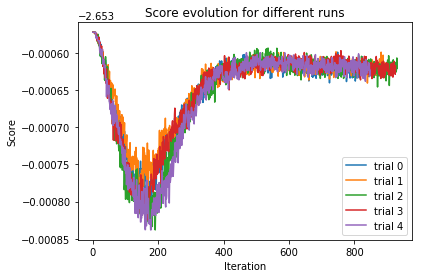

In [40]:
plt.figure();
for trial_idx, scores in enumerate(scores_all_trials):
    plt.plot(scores, label='trial ' + str(trial_idx));
plt.xlabel('Iteration');
plt.ylabel('Score');
plt.legend();
plt.title('Score evolution for different runs');

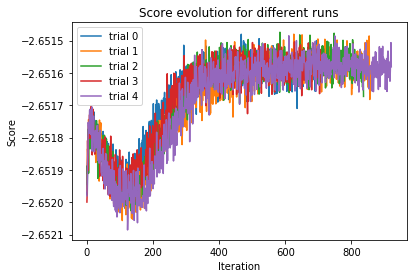

In [77]:
plt.figure();
for trial_idx, scores in enumerate(scores_all_trials):
    plt.plot(scores, label='trial ' + str(trial_idx));
plt.xlabel('Iteration');
plt.ylabel('Score');
plt.legend();
plt.title('Score evolution for different runs');

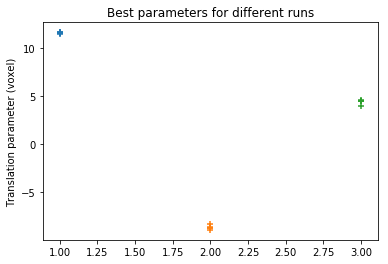

In [41]:
T_all_trials = np.array(T_all_trials)
plt.scatter(np.ones((T_all_trials.shape[0],)), T_all_trials[:, 3], marker='+');
plt.scatter(2*np.ones((T_all_trials.shape[0],)), T_all_trials[:, 7], marker='+');
plt.scatter(3*np.ones((T_all_trials.shape[0],)), T_all_trials[:, 11], marker='+');
plt.ylabel('Translation parameter (voxel)');
plt.title('Best parameters for different runs');

Best trial: 4
[[  9.94306455e-01   9.05498176e-02  -5.61729907e-02   1.16287554e+01]
 [ -8.99119767e-02   9.95854306e-01   1.37853976e-02  -8.72720466e+00]
 [  5.71883799e-02  -8.65628517e-03   9.98325878e-01   3.99235668e+00]]


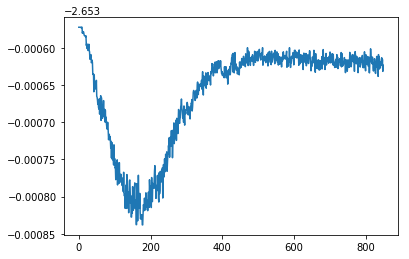

-2.65357198478 -2.65362317533


In [42]:
best_trial = np.argsort([np.max(scores) for scores in scores_all_trials])[-1]
# best_trial = 0
T = T_all_trials[best_trial]
scores = scores_all_trials[best_trial]
print 'Best trial:', best_trial
print T.reshape((3,4))
plt.figure();
plt.plot(scores);
plt.show();
print max(scores), scores[-1]

# Draw Results

In [80]:
t = time.time()

# local_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
# DataManager.load_alignment_parameters(stack_m=stack_moving, stack_f=stack_fixed,
#                                       classifier_setting_m=classifier_setting,
#                                       classifier_setting_f=classifier_setting,
#                                       warp_setting=warp_setting,
#                                       param_suffix=structure,
#                                       trial_idx=trial_idx)

local_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
(T, 
  aligner.centroid_m, aligner.centroid_f,
  aligner.xdim_m, aligner.ydim_m, aligner.zdim_m, 
  aligner.xdim_f, aligner.ydim_f, aligner.zdim_f)

# local_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
# ([1,0,0,0,0,1,0,0,0,0,1,0], 
#   aligner.centroid_m, aligner.centroid_f,
#   aligner.xdim_m, aligner.ydim_m, aligner.zdim_m, 
#   aligner.xdim_f, aligner.ydim_f, aligner.zdim_f)


# Read global tx
global_transformed_moving_structure_vol = \
DataManager.load_transformed_volume(stack_m=stack_moving, stack_f=stack_fixed,
                                    prep_id_f=2,
                                    detector_id_f=detector_id,
                                    warp_setting=upstream_warp_setting, 
                                    structure=structure)

# Transform
local_transformed_moving_structure_vol = transform_volume(vol=global_transformed_moving_structure_vol, 
                                         global_params=local_params, 
                                         centroid_m=centroid_m, centroid_f=centroid_f,
                                         xdim_f=xdim_f, ydim_f=ydim_f, zdim_f=zdim_f)

#         # Save
#         local_transformed_moving_structure_fn = \
#         DataManager.get_transformed_volume_filepath(stack_m=stack_moving, stack_f=stack_fixed,
#                                                     classifier_setting_m=classifier_setting,
#                                                     classifier_setting_f=classifier_setting,
#                                                     warp_setting=warp_setting,
#                                                     trial_idx=trial_idx,
#                                                     structure=structure)

#         create_if_not_exists(os.path.dirname(local_transformed_moving_structure_fn))
#         bp.pack_ndarray_file(local_transformed_moving_structure_vol, local_transformed_moving_structure_fn)

sys.stderr.write('Transform: %.2f seconds.\n' % (time.time() - t))

Transform: 2.35 seconds.


In [81]:
# Set colors for different contour level
levels = [0.1, 0.25, 0.5, 0.75, .99]
# levels = [0.5]
level_colors = {level: (int(level*255),0,0) for level in levels}

0 537 0 346 123 495
rm -rf "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N27-2015.08.26-22.22.46_MD594_2_0080_prep2_down8_IC_detector15_scoremapViz.jpg" && mkdir -p "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N27-2015.08.26-22.22.46_MD594_2_0080_prep2_down8_IC_detector15_scoremapViz.jpg" "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N27-2015.08.26-22.22.46_MD594_2_0080_prep2_down8_IC_detector15_scoremapViz.jpg"
rm -rf "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC27-2015.08.26-16.50.00_MD594_2_0080_prep2_down8_IC_detector15_scoremapViz.jpg" && mkdir -p "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC27-2015.08.26-16.50.00_MD594_2_0080_prep2_down8_IC_detector15_scoremapViz.jpg" "/shared/CSHL_scoremap_viz/down8/IC/M

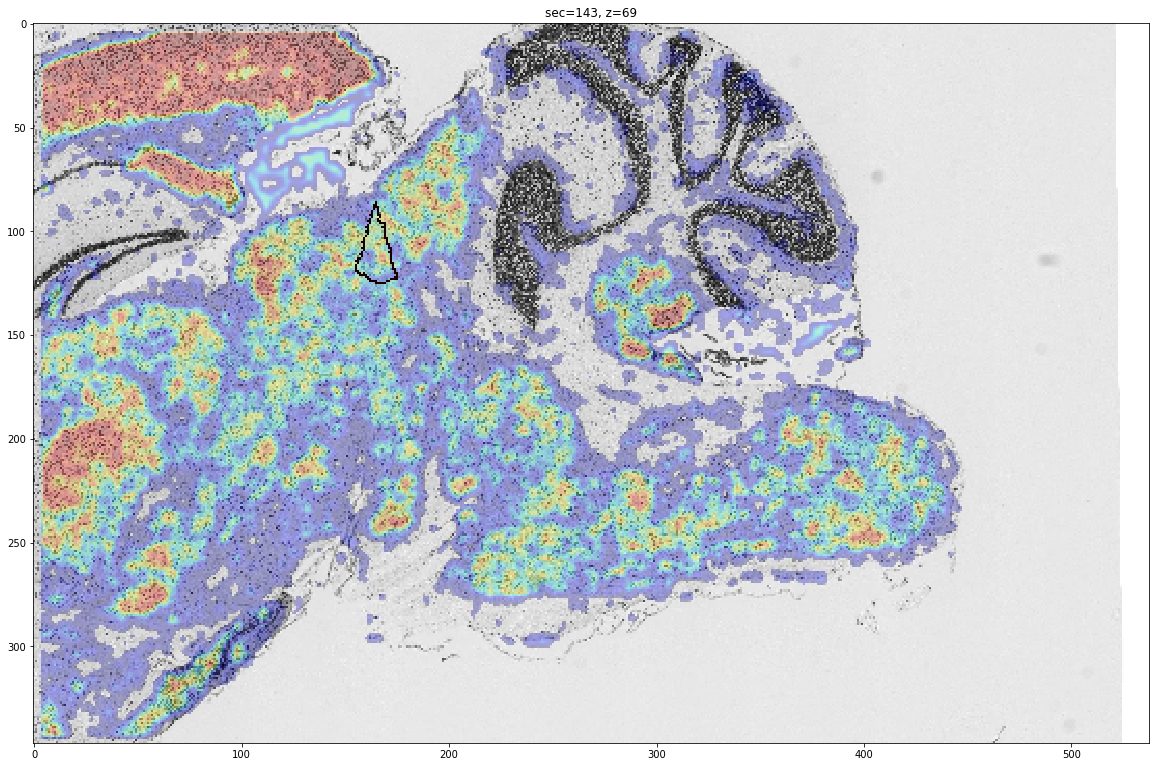

rm -rf "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC28-2015.08.26-16.53.26_MD594_1_0082_prep2_down8_IC_detector15_scoremapViz.jpg" && mkdir -p "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC28-2015.08.26-16.53.26_MD594_1_0082_prep2_down8_IC_detector15_scoremapViz.jpg" "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC28-2015.08.26-16.53.26_MD594_1_0082_prep2_down8_IC_detector15_scoremapViz.jpg"


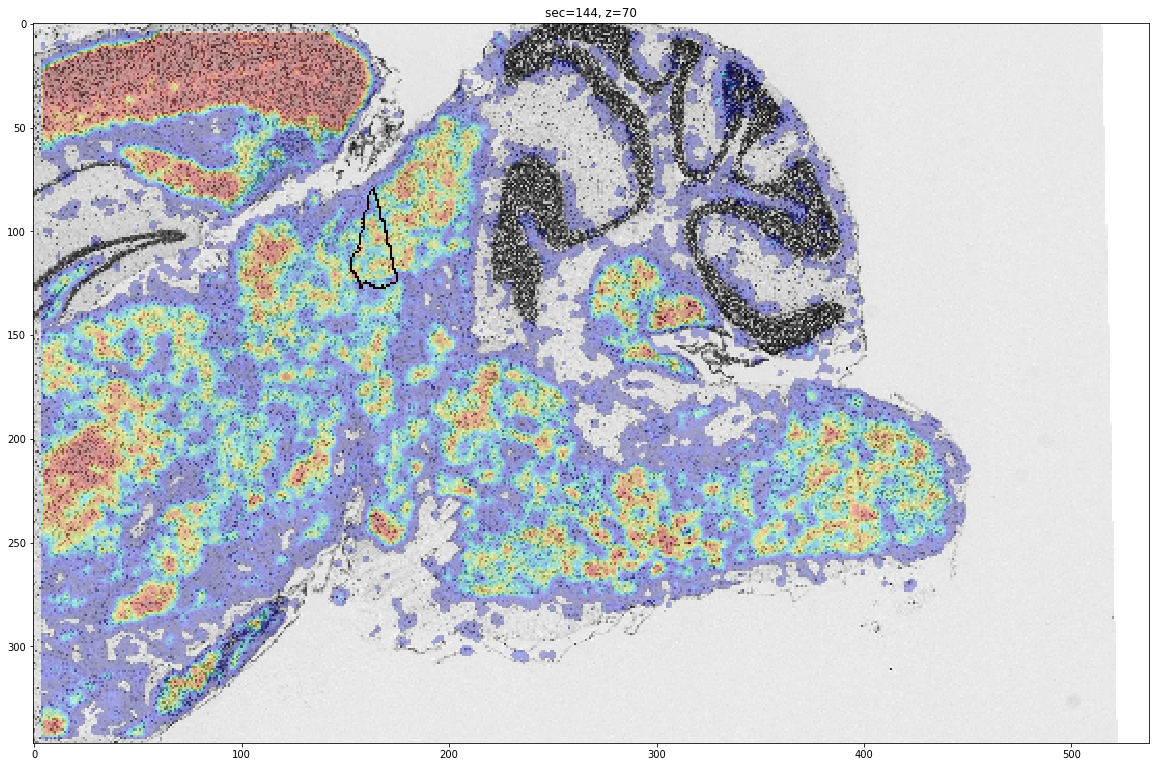

rm -rf "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N28-2015.08.26-22.26.13_MD594_2_0083_prep2_down8_IC_detector15_scoremapViz.jpg" && mkdir -p "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N28-2015.08.26-22.26.13_MD594_2_0083_prep2_down8_IC_detector15_scoremapViz.jpg" "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N28-2015.08.26-22.26.13_MD594_2_0083_prep2_down8_IC_detector15_scoremapViz.jpg"


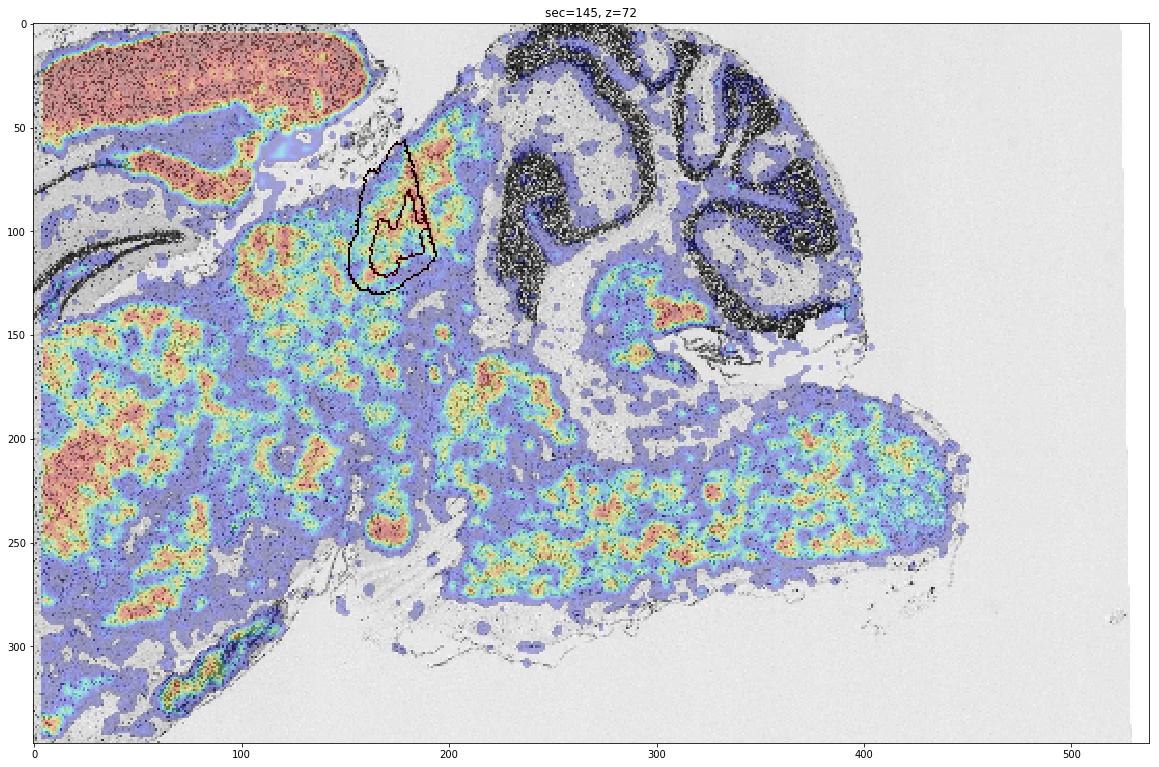

rm -rf "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC28-2015.08.26-16.53.26_MD594_2_0083_prep2_down8_IC_detector15_scoremapViz.jpg" && mkdir -p "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC28-2015.08.26-16.53.26_MD594_2_0083_prep2_down8_IC_detector15_scoremapViz.jpg" "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC28-2015.08.26-16.53.26_MD594_2_0083_prep2_down8_IC_detector15_scoremapViz.jpg"


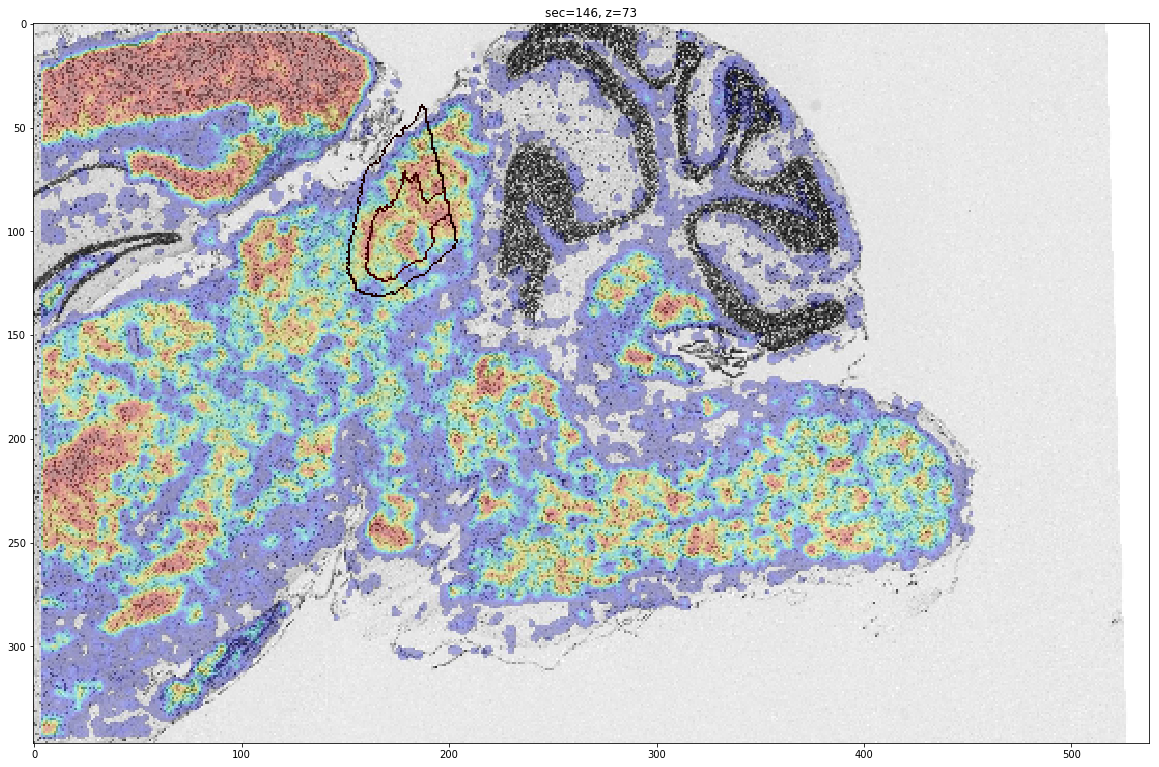

rm -rf "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N29-2015.08.26-22.29.38_MD594_1_0085_prep2_down8_IC_detector15_scoremapViz.jpg" && mkdir -p "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N29-2015.08.26-22.29.38_MD594_1_0085_prep2_down8_IC_detector15_scoremapViz.jpg" "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N29-2015.08.26-22.29.38_MD594_1_0085_prep2_down8_IC_detector15_scoremapViz.jpg"


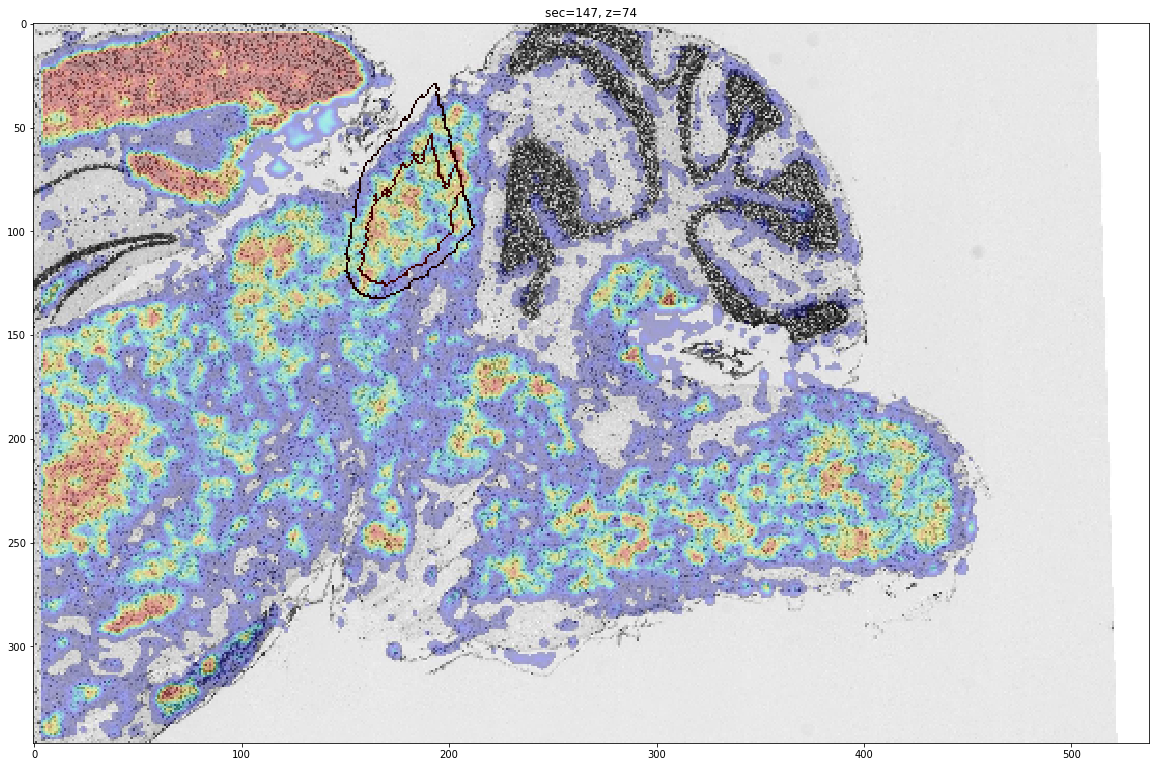

rm -rf "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC29-2015.08.26-16.56.59_MD594_1_0085_prep2_down8_IC_detector15_scoremapViz.jpg" && mkdir -p "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC29-2015.08.26-16.56.59_MD594_1_0085_prep2_down8_IC_detector15_scoremapViz.jpg" "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC29-2015.08.26-16.56.59_MD594_1_0085_prep2_down8_IC_detector15_scoremapViz.jpg"


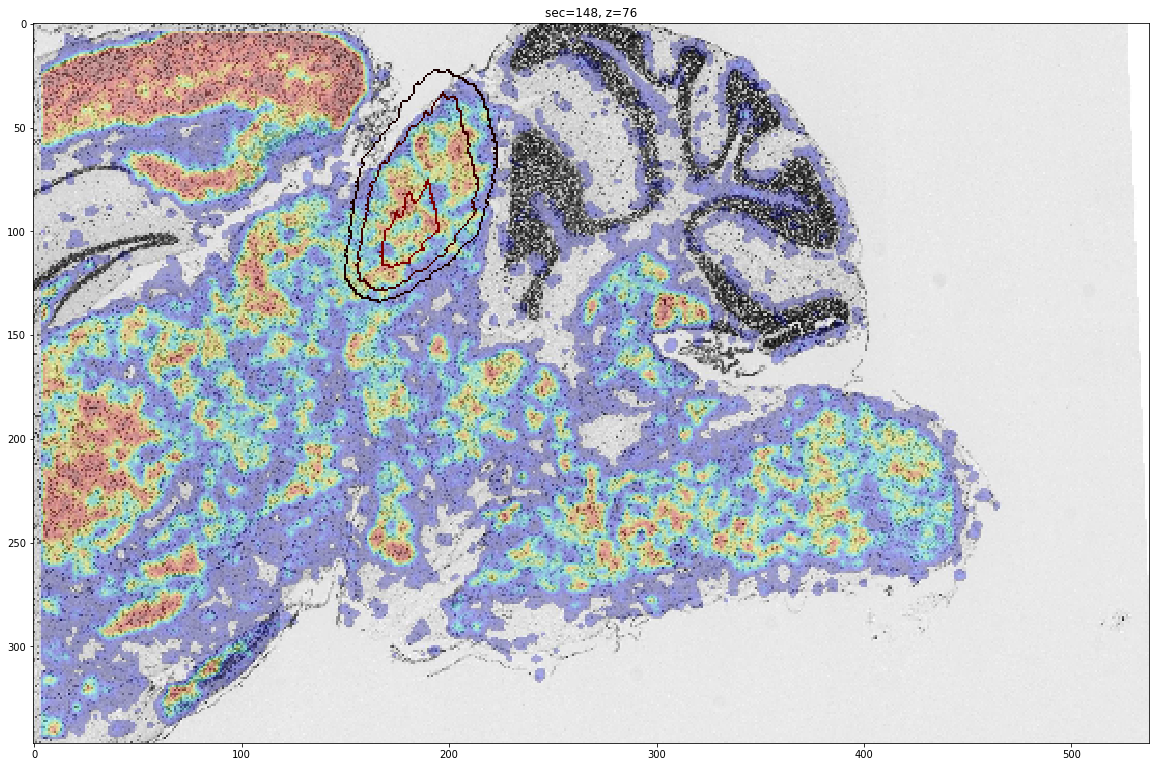

rm -rf "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N29-2015.08.26-22.29.38_MD594_2_0086_prep2_down8_IC_detector15_scoremapViz.jpg" && mkdir -p "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N29-2015.08.26-22.29.38_MD594_2_0086_prep2_down8_IC_detector15_scoremapViz.jpg" "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N29-2015.08.26-22.29.38_MD594_2_0086_prep2_down8_IC_detector15_scoremapViz.jpg"


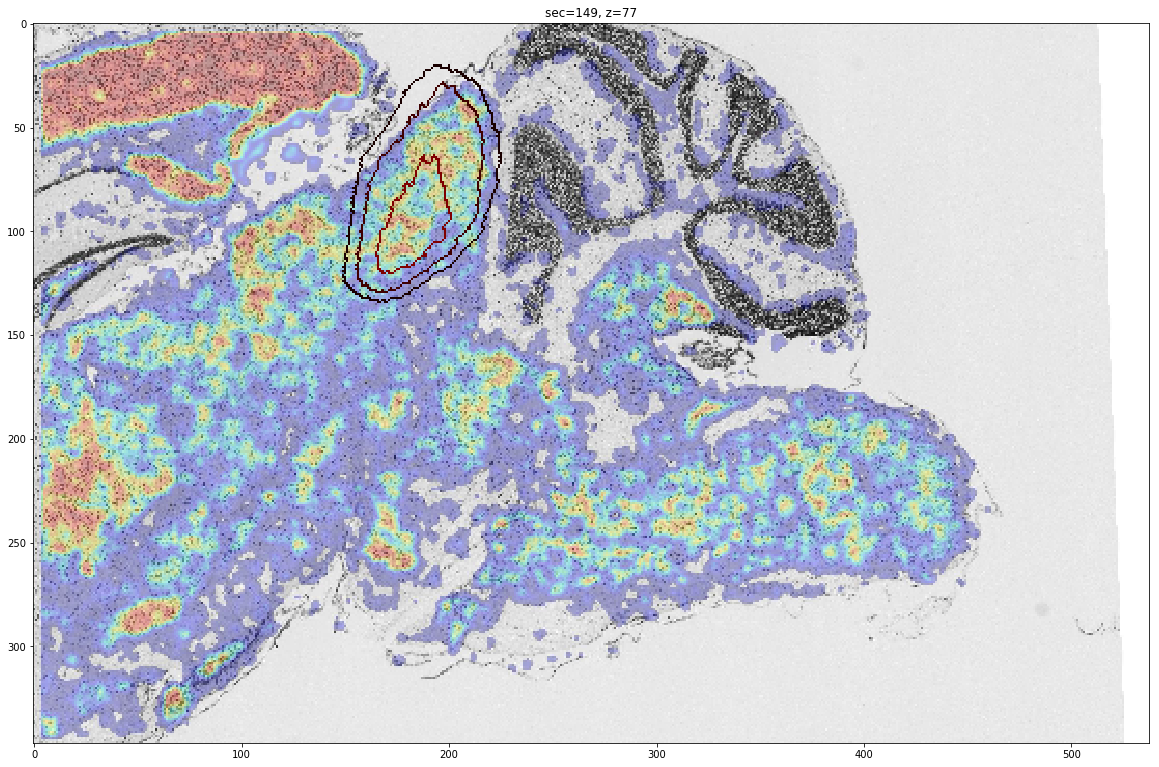

rm -rf "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC29-2015.08.26-16.56.59_MD594_2_0086_prep2_down8_IC_detector15_scoremapViz.jpg" && mkdir -p "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC29-2015.08.26-16.56.59_MD594_2_0086_prep2_down8_IC_detector15_scoremapViz.jpg" "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC29-2015.08.26-16.56.59_MD594_2_0086_prep2_down8_IC_detector15_scoremapViz.jpg"


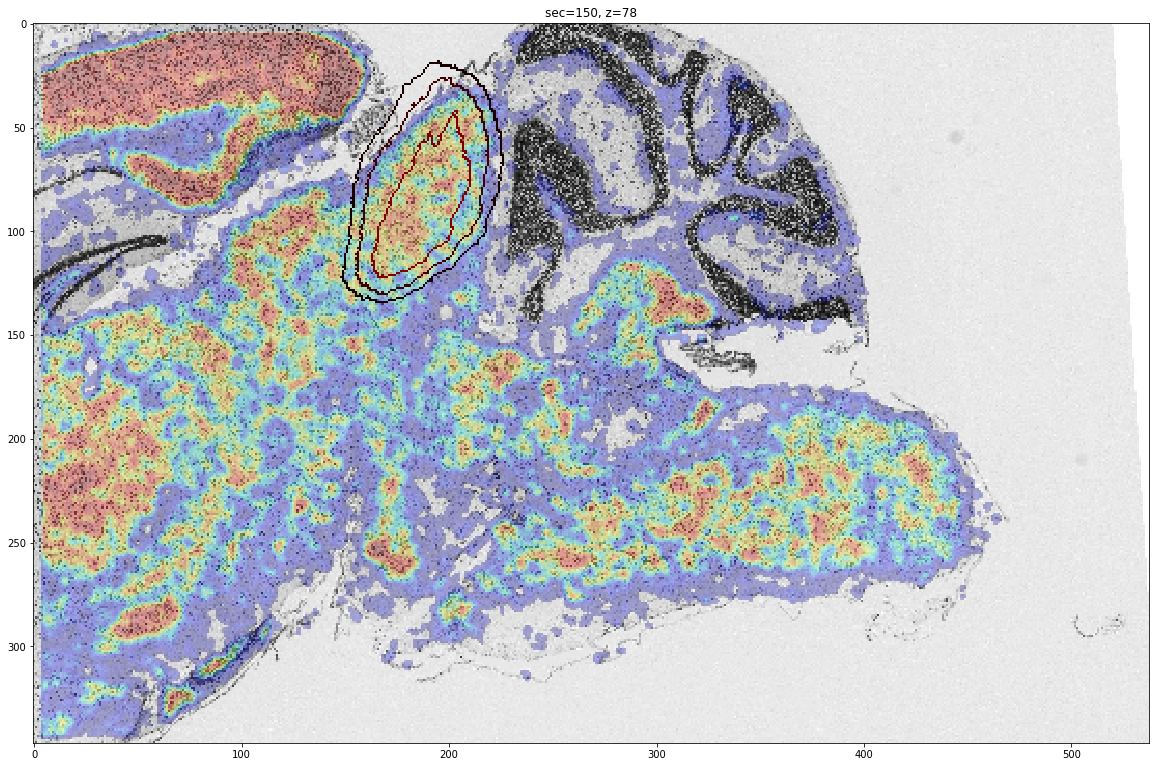

rm -rf "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N30-2015.08.26-22.33.07_MD594_1_0088_prep2_down8_IC_detector15_scoremapViz.jpg" && mkdir -p "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N30-2015.08.26-22.33.07_MD594_1_0088_prep2_down8_IC_detector15_scoremapViz.jpg" "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N30-2015.08.26-22.33.07_MD594_1_0088_prep2_down8_IC_detector15_scoremapViz.jpg"


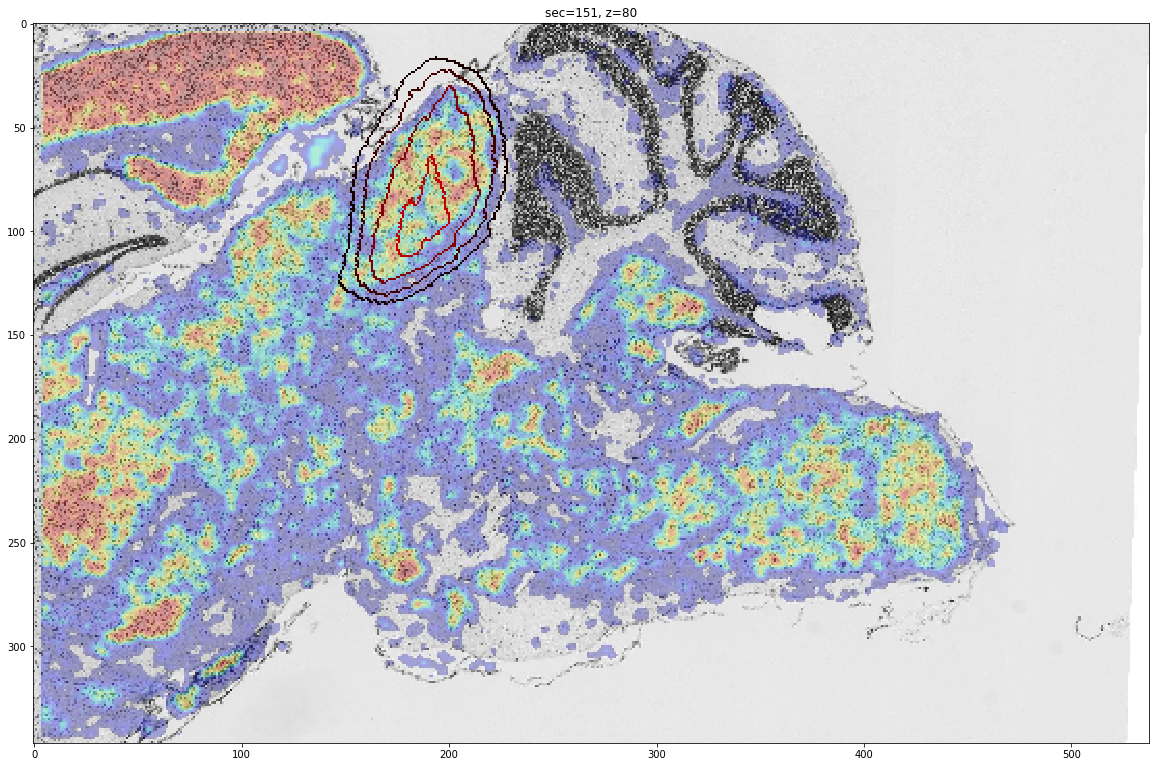

rm -rf "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC30-2015.08.26-17.00.29_MD594_1_0088_prep2_down8_IC_detector15_scoremapViz.jpg" && mkdir -p "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC30-2015.08.26-17.00.29_MD594_1_0088_prep2_down8_IC_detector15_scoremapViz.jpg" "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-IHC30-2015.08.26-17.00.29_MD594_1_0088_prep2_down8_IC_detector15_scoremapViz.jpg"


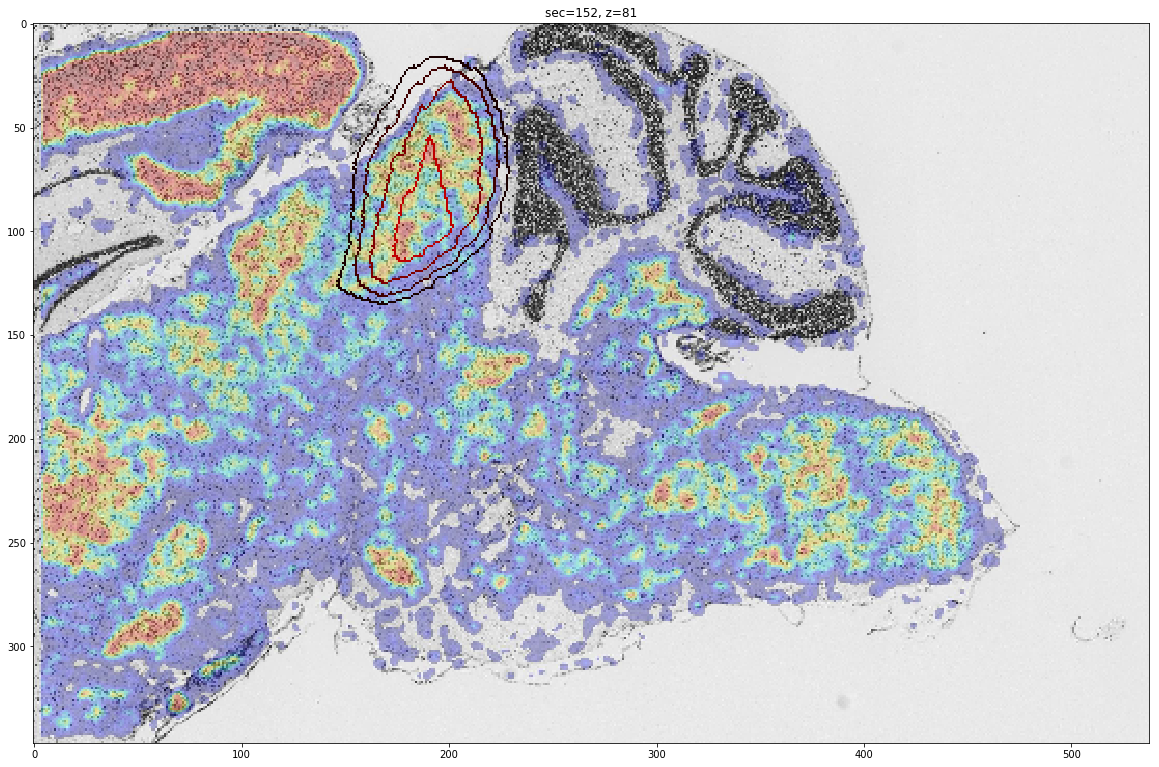

rm -rf "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N30-2015.08.26-22.33.07_MD594_2_0089_prep2_down8_IC_detector15_scoremapViz.jpg" && mkdir -p "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N30-2015.08.26-22.33.07_MD594_2_0089_prep2_down8_IC_detector15_scoremapViz.jpg" "/shared/CSHL_scoremap_viz/down8/IC/MD594/detector15/prep2/MD594-N30-2015.08.26-22.33.07_MD594_2_0089_prep2_down8_IC_detector15_scoremapViz.jpg"


KeyboardInterrupt: 

In [82]:
# Generate overlay visualization

# estimate mapping between z and section
# downsample_factor = 32
# xy_pixel_distance_downsampled = XY_PIXEL_DISTANCE_LOSSLESS * downsample_factor
# voxel_z_size = SECTION_THICKNESS / xy_pixel_distance_downsampled

# For getting correct contour location
xmin_vol_f, xmax_vol_f, ymin_vol_f, ymax_vol_f, zmin_vol_f, zmax_vol_f = \
DataManager.load_original_volume_bbox(stack=stack_fixed, volume_type='score', 
                                      prep_id=2, detector_id=detector_id,
                                      structure='7N', downscale=32)
print xmin_vol_f, xmax_vol_f, ymin_vol_f, ymax_vol_f, zmin_vol_f, zmax_vol_f

# Generate atlas overlay image for every section

zf, zl = bbox_3d(local_transformed_moving_structure_vol)[4:]
sec_first = DataManager.convert_z_to_section(stack=stack_fixed, z=zf, downsample=32)
sec_last = DataManager.convert_z_to_section(stack=stack_fixed, z=zl, downsample=32)

for sec in range(sec_first, sec_last+1):
# for sec in [181]:
    
    if is_invalid(stack=stack_fixed, sec=sec):
        continue
    
#     img_fn = DataManager.get_image_filepath(stack=stack_fixed, section=sec, resol='thumbnail', version='cropped_tif')
#     img = imread(img_fn)
    
    try:
#         img = DataManager.load_image(stack=stack_fixed, section=sec, resol='thumbnail', version='cropped_tif')
        sc_viz_fp = DataManager.get_scoremap_viz_filepath(stack=stack_fixed, section=sec, 
                                                           downscale=8,
                                                           structure=convert_to_original_name(structure), 
                                                           prep_id=2, detector_id=detector_id)
        download_from_s3(sc_viz_fp)
        img = imread(sc_viz_fp)[::4, ::4]
    except:
        sys.stderr.write('Error loading scoremap for section %d\n' % sec)
        continue
        
#     img = img[::4, ::4]
    
    viz = img.copy()
    
    z1, z2 = DataManager.convert_section_to_z(stack=stack_fixed, sec=sec, downsample=32)
    z = int(z1)
    
    # Find moving volume annotation contours
    c = 0
    vol = local_transformed_moving_structure_vol
    for level in levels:
        cnts = find_contours(vol[..., z], level=level) # rows, cols
        c += len(cnts)
        for cnt in cnts:
            # r,c to x,y
            cnt_on_cropped = cnt[:,::-1] + (xmin_vol_f, ymin_vol_f)
            cv2.polylines(viz, [cnt_on_cropped.astype(np.int)], True, level_colors[level], 1)
    
    if c > 0:    
        plt.figure(figsize=(20, 20));
        plt.title("sec=%d, z=%d" % (sec, z));
        plt.imshow(viz);
        plt.show();
    
#     viz_fp = DataManager.get_alignment_viz_filepath(stack_m=stack_moving,
#                                             stack_f=stack_fixed,
#                                             classifier_setting_m=classifier_setting,
#                                             classifier_setting_f=classifier_setting,
#                                             warp_setting=warp_setting,
#                                           section=sec)
    
#     create_if_not_exists(os.path.dirname(viz_fp))
#     imsave(viz_fp, viz)

In [191]:
display_image(viz)

/shared/MouseBrainAtlas/registration/tmp.jpg